In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
anonymized = False

In [3]:
db = "DB_CS250_Snapshot"
users = pd.read_json(f"{db}/users/documents.jsonl", lines=True)


In [4]:
with open(f"{db}/valid_anonymized_identifiers.jsonl") as f:
    valid_users = eval(f.read())
valid_user_ids = []
for user in valid_users:
    try:
        valid_user_ids.append(users[users["identifier"] == user]["_id"].values[0])
    except (IndexError, KeyError):
        # Ignore the error and continue with the next iteration
        pass
print(valid_user_ids)

['js7b3v4zm7ck6gfrbszka2xrqd6mcafb', 'js79jxes9fvwncxyzgtb8twntx6mh60p', 'js7b1w7ynja0n6g5d1rr7c773s6ma3n7', 'js78kvh0vzc2c7eejs6cz61rdn6mhhgg', 'js74pf2m8e8jrz2gg9s1hep35s6mfngw', 'js74rtyskgxt8wmnz35fsjwt8h6mdw23', 'js725t4xf89kx3xkydecq6ahpn6mfse8', 'js76fbh084j5tdeaa55epwha356mfab2', 'js72fgshqwsrghh9nyhcz73dtx6mmzta', 'js72pp4cjyem9s6x0r4cm99hdx6mcq58', 'js7dvsm1vdajp3vq0mbpc7zkds6ms94f', 'js7edy4cz6zbqjg373e2rnm32d6mekbz', 'js7e3hs87vrmnnm9fzma135btn6mgd29', 'js76e9y9f04fgk56a4817d1qa56mbszv', 'js71yt7g8d5mvbykapvjn5x4a16mc32n', 'js71kg73z66z0d2zh94wraaeg96mqpbb', 'js71v2af0tfkjx57xy21wqhyyx6md2et', 'js7bewfegj93szsr9cqxe5hc6n6mkr96', 'js72sr0aj5f7bkpmysybmw48ph6mathd', 'js77jjffzjf9pskspa6hh9sknh6ma65a', 'js771zzv7xrf2tqrm119961kwd6mc1x2', 'js73z7rencz13vsq7a0g6ta8c96mcn7j', 'js76bctjnnch2rt1xwtx5dk5816mqwkr', 'js722d7691qcagwwxy6atxm5ps6mkt4c', 'js70c7dm9p3zn0bq2gkzmvdw6s6mqbfy', 'js73ezxcsgx591bne9tbzxqsm16mpsnf', 'js77c2682g7g4qg2d780garyss6mb6ee', 'js7fbyrrpw5pay6n0jhwn218d9

## preliminary (not clean)

In [5]:
users_cleaned = users.copy()
users_cleaned["_creationTime"] = pd.to_datetime(users["_creationTime"], unit="ms")
users_cleaned

,_creationTime,_id,completedExercises,email,group,id,identifier,isAdmin,name,researchConsent,earlyAccess
0,2024-03-01 09:13:16.823632812,js700ez83nkj5anqr0mm15wwg96mf00y,"[k17986at882ejjew66z1bgx5w96m67y2, k17dh8h1cdv...",None,A,vnapuzpbjbekm43,3a881d3e3c681a68393f6c95c8433ffa488259e1869b4f...,False,None,1.0,NaN
1,2024-02-28 10:32:41.311772949,js700hrcnazkzxazxgmmt1hy716mb8x9,"[k17986at882ejjew66z1bgx5w96m67y2, k17dh8h1cdv...",None,A,hvgb49leasmg8mc,ec59ea060b7740c04816c7c2eb37332d91ede2ead3d31d...,False,None,1.0,NaN
2,2024-02-29 11:07:10.751099854,js700m63vztkq4ytws5fwxv2e96mczrf,"[k17dh8h1cdvfn45j3527z3w2d96m8zk6, k17986at882...",None,B,jd89mveusofakua,5bbeb83d36fd4b197b2564987cf1ece1570089818878a0...,False,None,1.0,NaN
3,2024-02-29 18:42:03.545846924,js701chb5jpjscfngs17shmd6x6mdke2,"[k17986at882ejjew66z1bgx5w96m67y2, k17dh8h1cdv...",None,A,issiz6vuc2pemwv,1bc8c3a3ef5102175d0fdf8d758ce2968f6e45d8e34a2a...,False,None,1.0,NaN
4,2024-03-01 14:23:11.138682617,js701eymksy3328bjj0494p7fn6me57v,"[k17986at882ejjew66z1bgx5w96m67y2, k17dh8h1cdv...",None,A,zkq64q78ivll23x,725a96e6d6c48cbbacfa5452495c6a38815652dde1fbbe...,False,None,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
576,2024-02-28 15:15:53.089539307,js7ftsp5ee095qah6xnp1efwch6mav2z,"[k17986at882ejjew66z1bgx5w96m67y2, k17dh8h1cdv...",None,B,jju96bxatr09bvk,cd590cfd589b9b661756f6e338072c4c0ce222a160d15a...,False,None,1.0,NaN
577,2024-02-29 18:07:51.370882324,js7fvt1xvgcdp76ehnbg6msrgh6mcj29,"[k17986at882ejjew66z1bgx5w96m67y2, k17dh8h1cdv...",None,A,xb2068nuvpcnww2,a1136c124eee9de753bcfda9ab4fc5b463e771f079176b...,False,None,1.0,NaN
578,2024-03-04 17:43:56.728198975,js7fx0b93h60fvrm7ccd3wsm2h6mmd2f,"[k17986at882ejjew66z1bgx5w96m67y2, k17dh8h1cdv...",None,B,2720a8m3i2175po,eebf668787759ebb0f4752f54ee8107d1c7eab041ca619...,False,None,1.0,NaN
579,2024-02-28 13:22:59.746491455,js7fz2q2v14cavgn5pahwbwhk16mb0fs,"[k17986at882ejjew66z1bgx5w96m67y2, k17dh8h1cdv...",None,B,vk4zdcsa8aqzkgm,74bf555d4e8e77f1e209ab1e214fd064923b238617eff9...,False,None,1.0,NaN


In [6]:
users_cleaned.rename(columns={"_id": "userId"}, inplace=True)

In [7]:
attempts = pd.read_json(f"{db}/attempts/documents.jsonl", lines=True)
attempts.head()

,_creationTime,_id,exerciseId,status,threadId,userId
0,1.710201e+12,j57000k8awx3fxa7e1jstd7nh96n240h,k172pq4w6s747qpvz0aebwz50n6mnvgg,quizCompleted,None,js7apc4p5kbrgf06h254dd8rd96mghpq
1,1.709590e+12,j57000nj7jh30qgbcptvftzt8x6mn7mt,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizCompleted,None,js772btmge1q78y2b716fgyjxd6mmktb
2,1.710331e+12,j57003d1yy378arev5vskas8xn6n601p,k1715d99fyvzt35jfm2638g3nd6n35z3,quizCompleted,thread_jD5Uc0kC1X0KO1pRXpj6vkqV,js76xv4f6h6t96zha9v0mmdn7x6ma9ry
3,1.716248e+12,j5700462stkv86ajqeghvg94n96sec9z,k176kkt806khrpxnctb9hczm316rtsrq,quizCompleted,None,js7e6hx7x33s4q1gtt9fsa9aj56mdqfx
4,1.715866e+12,j570062w3h5a4jjsr7w2j13men6s7bf5,k177dxhnpwwtrq9dy5770jmrwx6rvzrr,quizCompleted,thread_GN6jtQBB4wOiFbg4fN18rV1P,js78v5dpej1n6ee7h7mc48a4a56md0nz


In [8]:
#calculate the number of attempts per user
weeks = pd.read_json(f"{db}/weeks/documents.jsonl", lines=True)
weeks=weeks[weeks["name"]!="Playground for the first three Quizzes"]
attempts["week"] = attempts["_creationTime"].apply(lambda x: next(iter(weeks.query("startDate < @x < endDate")["name"].values), "invalid"))

In [9]:
attempts["week"].value_counts()

week
Quiz #1     1351
Quiz #6     1187
Quiz #5     1017
Quiz #4     1000
Quiz #2      997
Quiz #3      982
Quiz #10     934
Quiz #8      915
Quiz #7      898
Quiz #9      887
Quiz #11     870
invalid      472
Name: count, dtype: int64

<Axes: xlabel='week'>

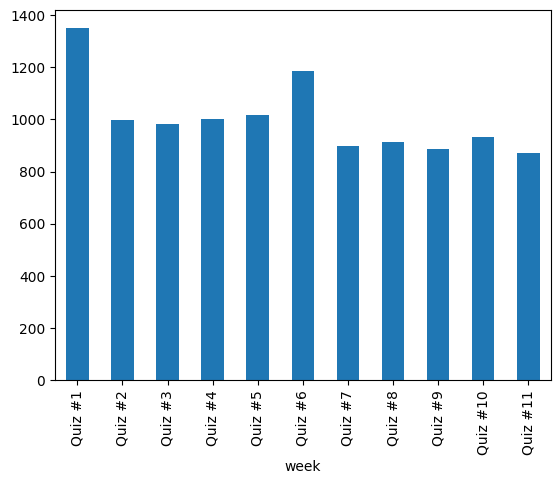

In [10]:
attempt_cleaned = attempts.copy()
attempt_cleaned = attempt_cleaned[attempt_cleaned["week"]!="invalid"]
order = ["Quiz #1", "Quiz #2", "Quiz #3", "Quiz #4", "Quiz #5", "Quiz #6", "Quiz #7", "Quiz #8", "Quiz #9", "Quiz #10", "Quiz #11"]
attempt_cleaned["week"].value_counts().reindex(order).plot(kind="bar")

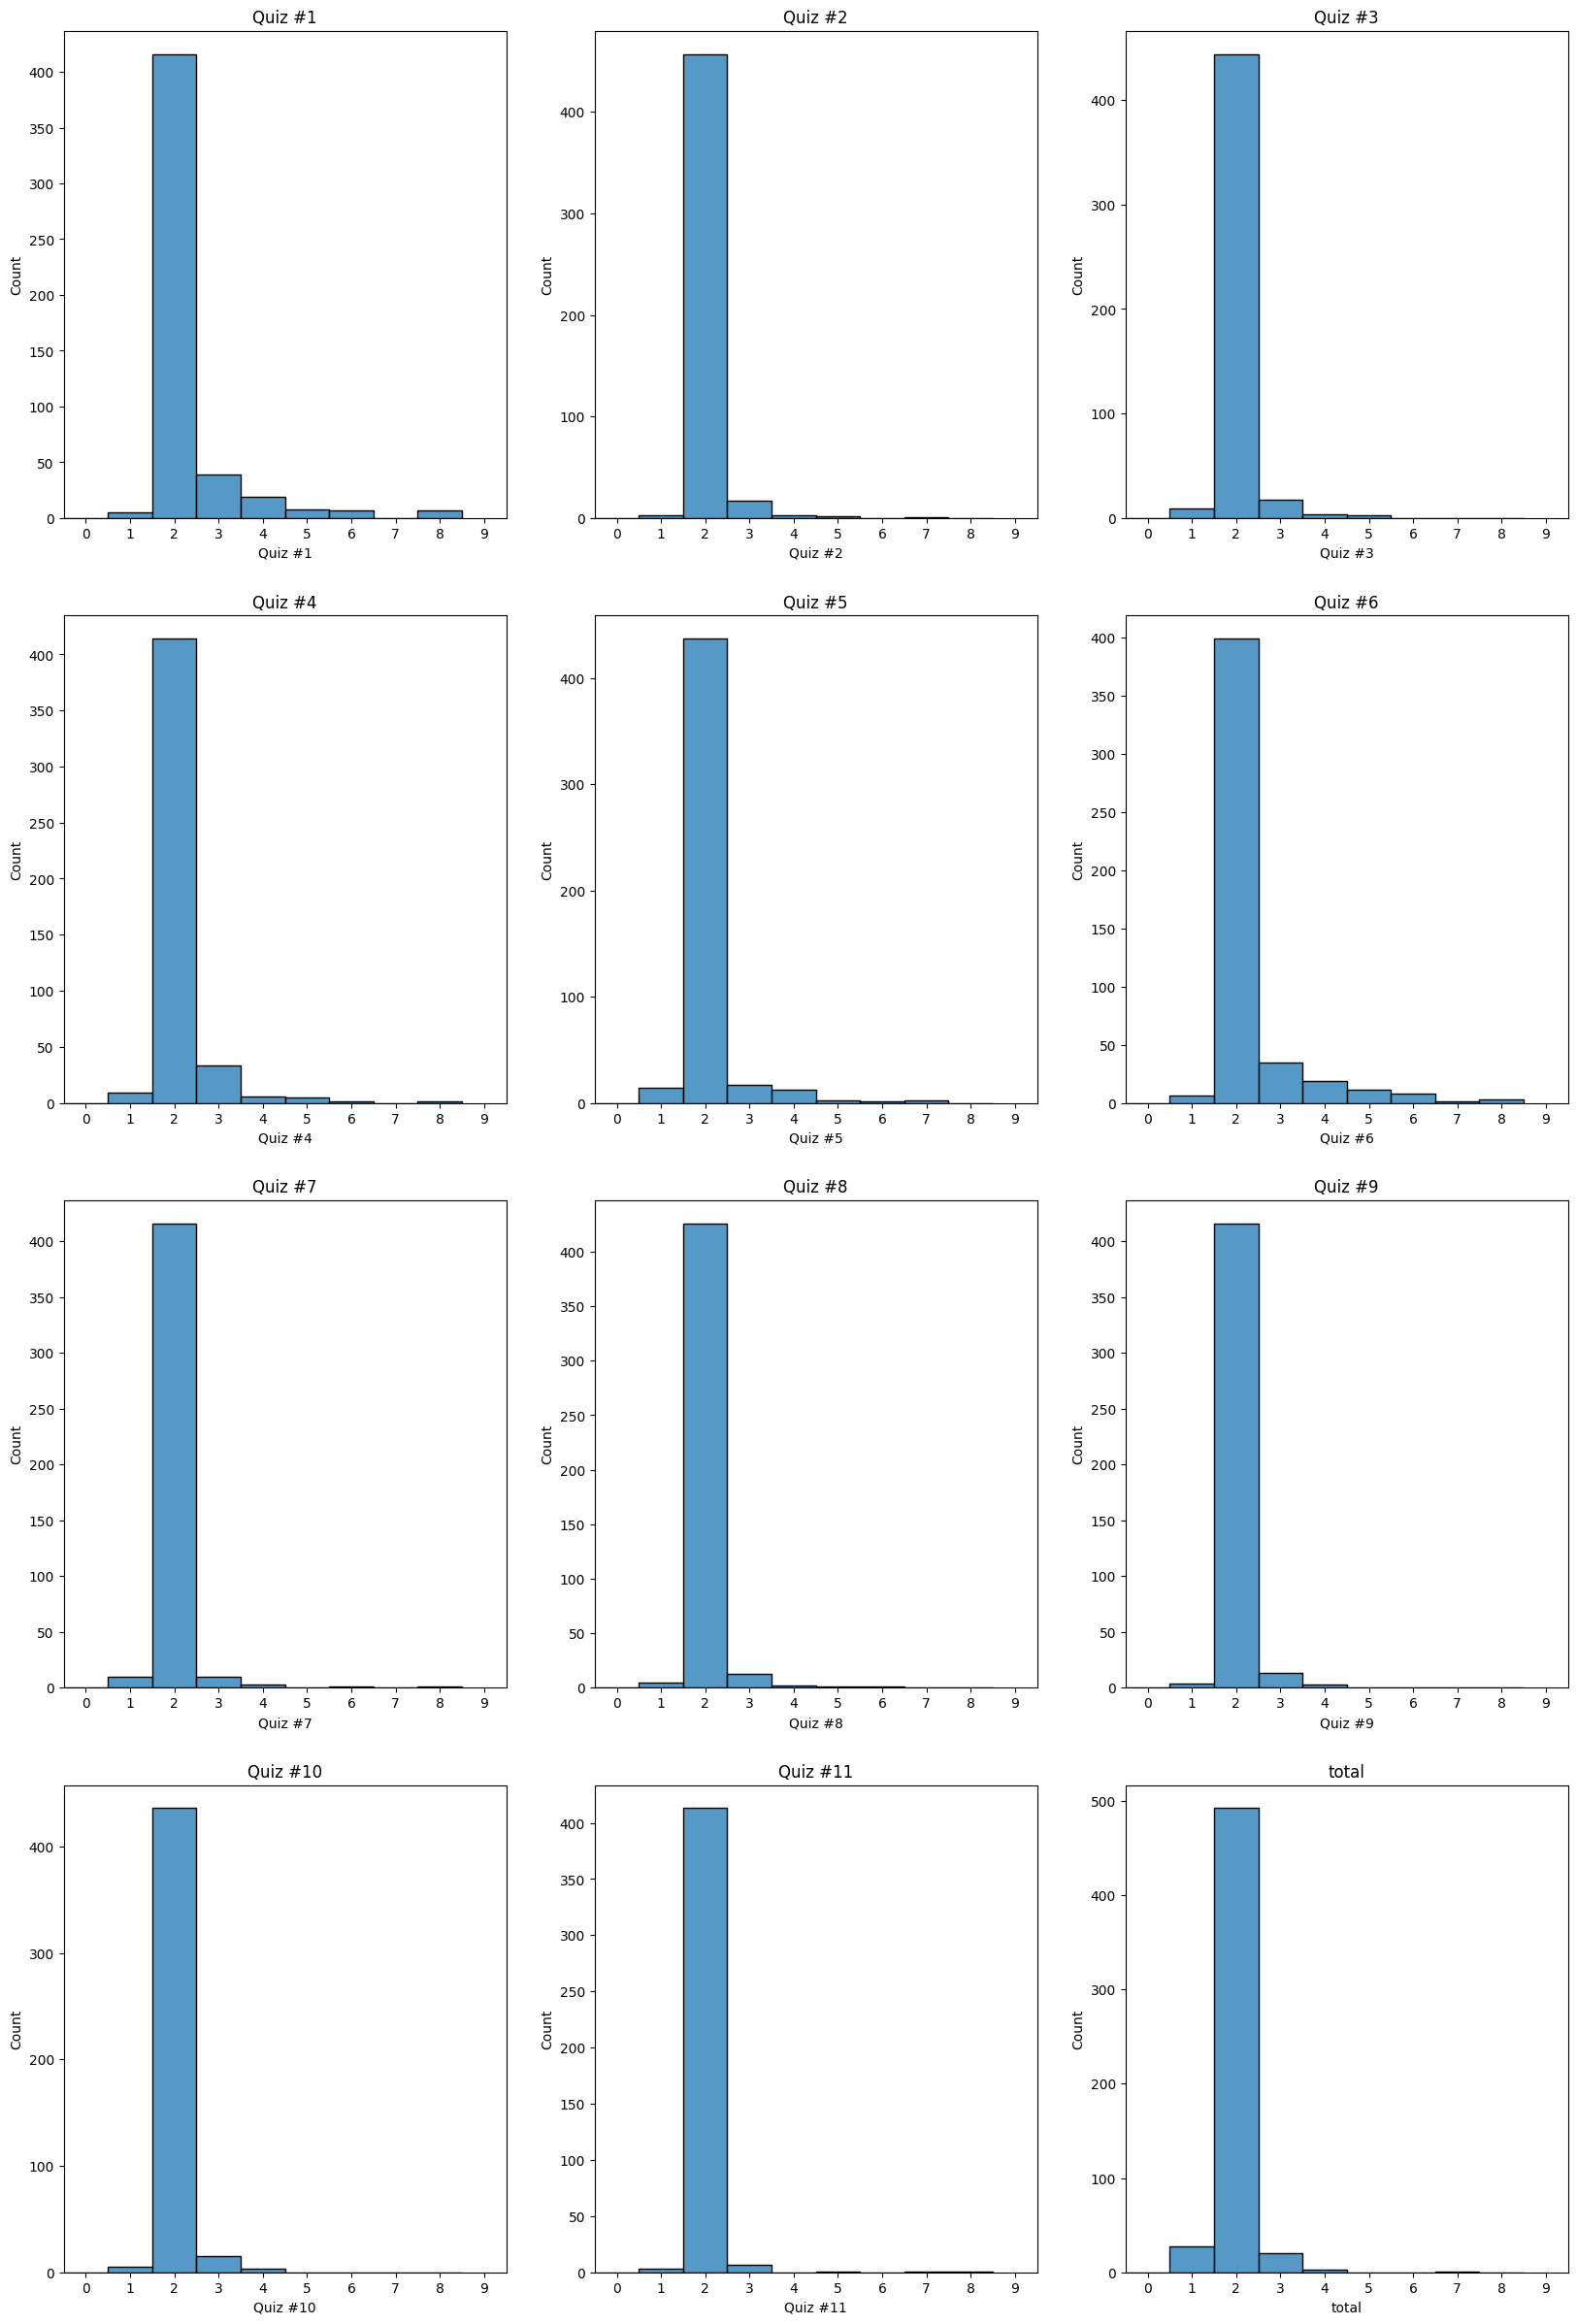

In [11]:
# Attempts per user per week
attempts_per_user_per_week = attempt_cleaned.groupby(["userId", "week"]).size().unstack()

attempts_per_user_per_week = attempts_per_user_per_week[order]
attempts_per_user_per_week["total"] = attempts_per_user_per_week.mean(axis=1, skipna=True)
fig, axs = plt.subplots(4,3, figsize=(20, 30))
bins = np.arange(0, 10, 1)
for column,ax in enumerate(attempts_per_user_per_week.columns):
    sns.histplot(attempts_per_user_per_week[ax], ax=axs[column//3, column%3],bins=bins)
    axs[column//3, column%3].set_xticks(bins+0.5, [str(x) for x in bins])
    axs[column//3, column%3].set_title(ax)
    axs[column//3, column%3].set_xlim(0, 10)


In [12]:
#Number of unique users per week
unique_users_per_week = attempts.groupby("week")["userId"].nunique()
display(unique_users_per_week[order])

#total number of students 
n_students = users_cleaned["userId"].nunique()
n_students

week
Quiz #1     513
Quiz #2     483
Quiz #3     478
Quiz #4     469
Quiz #5     485
Quiz #6     487
Quiz #7     441
Quiz #8     448
Quiz #9     436
Quiz #10    459
Quiz #11    426
Name: userId, dtype: int64

581

## Number of completed exercises per users


<Axes: ylabel='Frequency'>

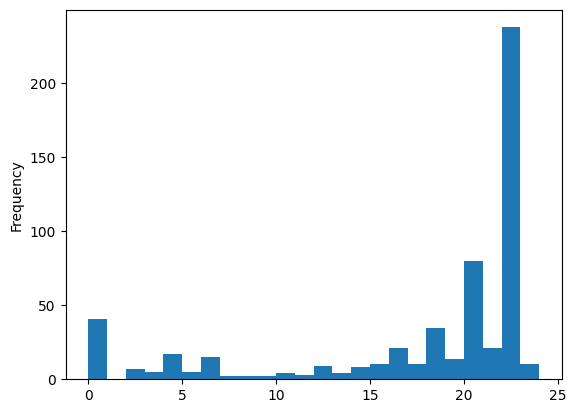

In [13]:
users_2  = users.copy()
users_2 = users_2[["completedExercises","group"]]
users_2["n_completed"] = users_2["completedExercises"].apply(len)
#plot the number of completed exercises per user
users_2["n_completed"].plot(kind="hist", bins=range(0, 25, 1))


## Log analysis

In [14]:
logs = pd.read_json(f"{db}/logs/documents.jsonl", lines=True)

In [15]:
logs.columns

Index(['_creationTime', '_id', 'attemptId', 'exerciseId', 'type', 'userId',
       'variant', 'details', 'systemMessageId', 'userMessageId'],
      dtype='object')

In [16]:
if anonymized :
    logs = logs[logs['userId'].isin(valid_user_ids)]

In [17]:
exercises = pd.read_json(f"{db}/exercises/documents.jsonl", lines=True)


In [18]:
logs["exerciseName"] = logs["exerciseId"].apply(lambda x: exercises[exercises["_id"]==x]["name"].values[0])
logs["controlGroup"] = logs["exerciseId"].apply(lambda x: exercises[exercises["_id"]==x]["controlGroup"].values[0])
logs["userGroup"] = logs["userId"].apply(lambda x: users[users["_id"]==x]["group"].values[0])

In [19]:
logs.head()

,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,exerciseName,controlGroup,userGroup
0,1.715443e+12,k570005nhp144860betwtwy7v56rx64m,j571kc5p8ah7yvj1xhng7nzpgs6rxy2m,k179wpzex0za69rx2wyv02e9hd6rj4fb,attemptStarted,js71tk2nax2wvs97m3vgc5erp16mds09,reading,NaN,NaN,NaN,Kruskal's algorithm,A,A
1,1.713254e+12,k57000a4rv5wgy13d63pqyt51s6qb2vv,j57adjsev6qjazakv9p4ad7qwh6qany3,k1710bmgh2mwgaqv7sjkmmfh1x6pveqf,quizSubmission,js7ese808vctnr15sy1te2pvx96mndmx,explain,"{'answers': [2.0, 0.0, 2.0], 'correctness': 1....",NaN,NaN,Optimal Binary Search Trees,A,B
2,1.716222e+12,k57000d308fpr45yqrprf6wrs56see5h,j572qtbd19x89mraje17mmj30x6sen0s,k176kkt806khrpxnctb9hczm316rtsrq,quizSubmission,js78b7hq6r6pk2c0mm9d2he91s6mjb8v,reading,"{'answers': [2.0, 3.0, 0.0], 'correctness': 1....",NaN,NaN,Dijkstra,A,A
3,1.713428e+12,k57000m99awdk4jw41cjfe4jkn6qf1jj,j572w733907q5k2w0kkk4a19z96qfaec,k171kqa60g6a9qpm0f0jv07wn16ptnr1,quizSubmission,js7e56b2v2t5nacr7e4n8dnn3d6mb606,explain,"{'answers': [0.0, 1.0, 1.0], 'correctness': 0....",NaN,NaN,Breadth-First Search,B,A
4,1.710348e+12,k57000mdpmrfm67q4eymvsbqns6n6ezf,j571e3e401tqj2mag6mjgrcynx6n7t96,k1715d99fyvzt35jfm2638g3nd6n35z3,exerciseCompleted,js7534h7gnm8pmyem0n6ttdb816mb94w,explain,NaN,NaN,NaN,Heap Sort,A,B


In [20]:
#creation time of the logs
logs["_creationTime"] = pd.to_datetime(logs["_creationTime"], unit="ms")

In [21]:
#exercise week
exo_week = exercises[["_id","weekId"]].merge(weeks[["_id","name"]].rename(columns={"_id":"weekId"}),on="weekId")
logs_grouped=logs.copy()
logs_grouped["week"] = logs_grouped["exerciseId"].apply(lambda x: next(iter(exo_week[exo_week["_id"]==x]["name"].values), "invalid"))

In [22]:
quiz_started = logs_grouped[logs_grouped['type'] == "quizStarted"]

correct_submissions = logs_grouped[(logs_grouped['type'] == "quizSubmission") & 
                        (logs_grouped['details'].apply(lambda x: isinstance(x, dict) and x.get('correctness') == 1))]

logs_grouped_quiz = pd.concat([quiz_started, correct_submissions])


In [23]:
logs_grouped_quiz["type"].value_counts()

type
quizStarted       10340
quizSubmission    10150
Name: count, dtype: int64

count    8686.000000
mean        6.882698
std         6.400603
min         0.019248
25%         2.218739
50%         4.758933
75%         9.511630
max        29.923447
Name: timeSpent, dtype: float64


,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,exerciseName,controlGroup,userGroup,week,timeSpent
136599,2024-06-02 12:28:36.140268799,k57e67hzw952mvwm412nrr1eqh6t8z5k,j57f208xm1zp17sa8kq0q9w0rd6t8kn7,k17a4tg5hjjhtdvw4ksyykn05d6t821q,quizStarted,js78qw5bbj091w1xv4fwm3f6wx6ksj7p,explain,NaN,NaN,NaN,Offside rule,none,A,Testing,3.293773
1,2024-04-16 08:00:01.116921631,k57000a4rv5wgy13d63pqyt51s6qb2vv,j57adjsev6qjazakv9p4ad7qwh6qany3,k1710bmgh2mwgaqv7sjkmmfh1x6pveqf,quizSubmission,js7ese808vctnr15sy1te2pvx96mndmx,explain,"{'answers': [2.0, 0.0, 2.0], 'correctness': 1....",NaN,NaN,Optimal Binary Search Trees,A,B,Quiz #5,18.036219
2,2024-05-20 16:28:14.092592285,k57000d308fpr45yqrprf6wrs56see5h,j572qtbd19x89mraje17mmj30x6sen0s,k176kkt806khrpxnctb9hczm316rtsrq,quizSubmission,js78b7hq6r6pk2c0mm9d2he91s6mjb8v,reading,"{'answers': [2.0, 3.0, 0.0], 'correctness': 1....",NaN,NaN,Dijkstra,A,A,Quiz #10,12.279168
18,2024-05-20 22:26:38.605231689,k570020s30de70wmf1h6nykz656se1pn,j5758hsghgpawmpx1fs4dfw4dh6se5f2,k176kkt806khrpxnctb9hczm316rtsrq,quizSubmission,js72aq07fdjwtjacx6p1rc003h6mpgzd,explain,"{'answers': [2.0, 1.0, 1.0], 'correctness': 1....",NaN,NaN,Dijkstra,A,B,Quiz #10,3.505722
19,2024-02-28 14:17:50.290733887,k5700224v92a96r7hgdg9txmm56ma50s,j5729qtjx03m321473tb27abrd6mbagz,k17dh8h1cdvfn45j3527z3w2d96m8zk6,quizSubmission,js7cap155dyp1v1ny2h2qad4096mbv9a,explain,"{'answers': [2.0, 1.0, 0.0], 'correctness': 1....",NaN,NaN,Merge Sort,B,A,Quiz #1,3.159498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153918,2024-05-10 11:52:03.056689453,k57fznt7sft1241x2mp7v61qhx6rt5rc,j576k1sr6bhvd97d93ebgbthcx6rt065,k179wpzex0za69rx2wyv02e9hd6rj4fb,quizSubmission,js74x2wtfwbf5wwb0w711s421s6md27d,reading,"{'answers': [0.0, 0.0, 1.0], 'correctness': 1....",NaN,NaN,Kruskal's algorithm,A,A,Quiz #9,5.149442
153926,2024-04-15 23:49:49.210630371,k57fzpms97qtr0s9s1merch0556q9gc3,j57es1gb0fv4rfyzn6nwv81v256q93f4,k1710bmgh2mwgaqv7sjkmmfh1x6pveqf,quizSubmission,js7etp9z7zdcckzbm5459xw0tn6mq8x8,explain,"{'answers': [1.0, 2.0, 2.0], 'correctness': 1....",NaN,NaN,Optimal Binary Search Trees,A,B,Quiz #5,1.131433
153952,2024-03-28 16:18:57.346461182,k57fztatzgc0aebr983329we396p5wqd,j576c3rve0ng3j82m1s4spgjk16p4szt,k1779x2fet2p0zkazg66nvfcjh6p2vbm,quizSubmission,js7984yjpe01cj1761gygtt3dx6mafdh,reading,"{'answers': [1.0, 1.0], 'correctness': 1.0, 'q...",NaN,NaN,Rod Cutting,B,B,Quiz #4,3.758727
153957,2024-03-29 18:31:40.189601562,k57fztzyxqtejbmqr9qfq22qs16p7r3d,j57dj549yp772j7f0gnja81rk56p6x9r,k17asvnfeyp3q949hdkwjq2and6p2x6e,quizSubmission,js72scetcm5w4sv1761y4eg5vs6mbrm7,explain,"{'answers': [3.0, 2.0], 'correctness': 1.0, 'q...",NaN,NaN,Matrix-Chain Multiplication,A,B,Quiz #4,9.610693


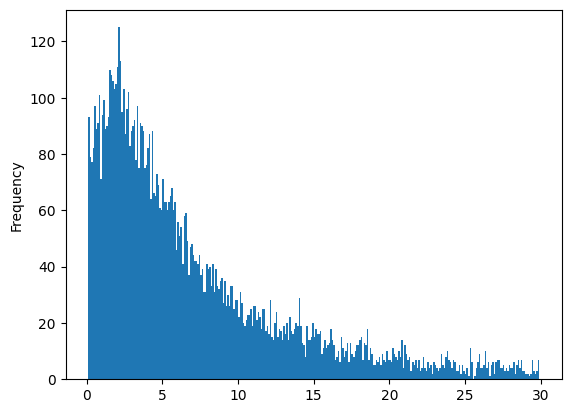

In [24]:
logs_grouped_quiz["timeSpent"] = logs_grouped_quiz.groupby(["userId", "exerciseName"])[["_creationTime"]].diff()
logs_grouped_quiz["timeSpent"] = logs_grouped_quiz["timeSpent"].apply(lambda x: x.total_seconds()/60)
logs_grouped_quiz_cleantime = logs_grouped_quiz[(logs_grouped_quiz["timeSpent"] > 0) & (logs_grouped_quiz["timeSpent"] < 30)]
bins = np.arange(0.1, 30, 0.1)
logs_grouped_quiz_cleantime["timeSpent"].plot(kind="hist", bins=bins)
print(logs_grouped_quiz_cleantime["timeSpent"].describe())
display(logs_grouped_quiz_cleantime)

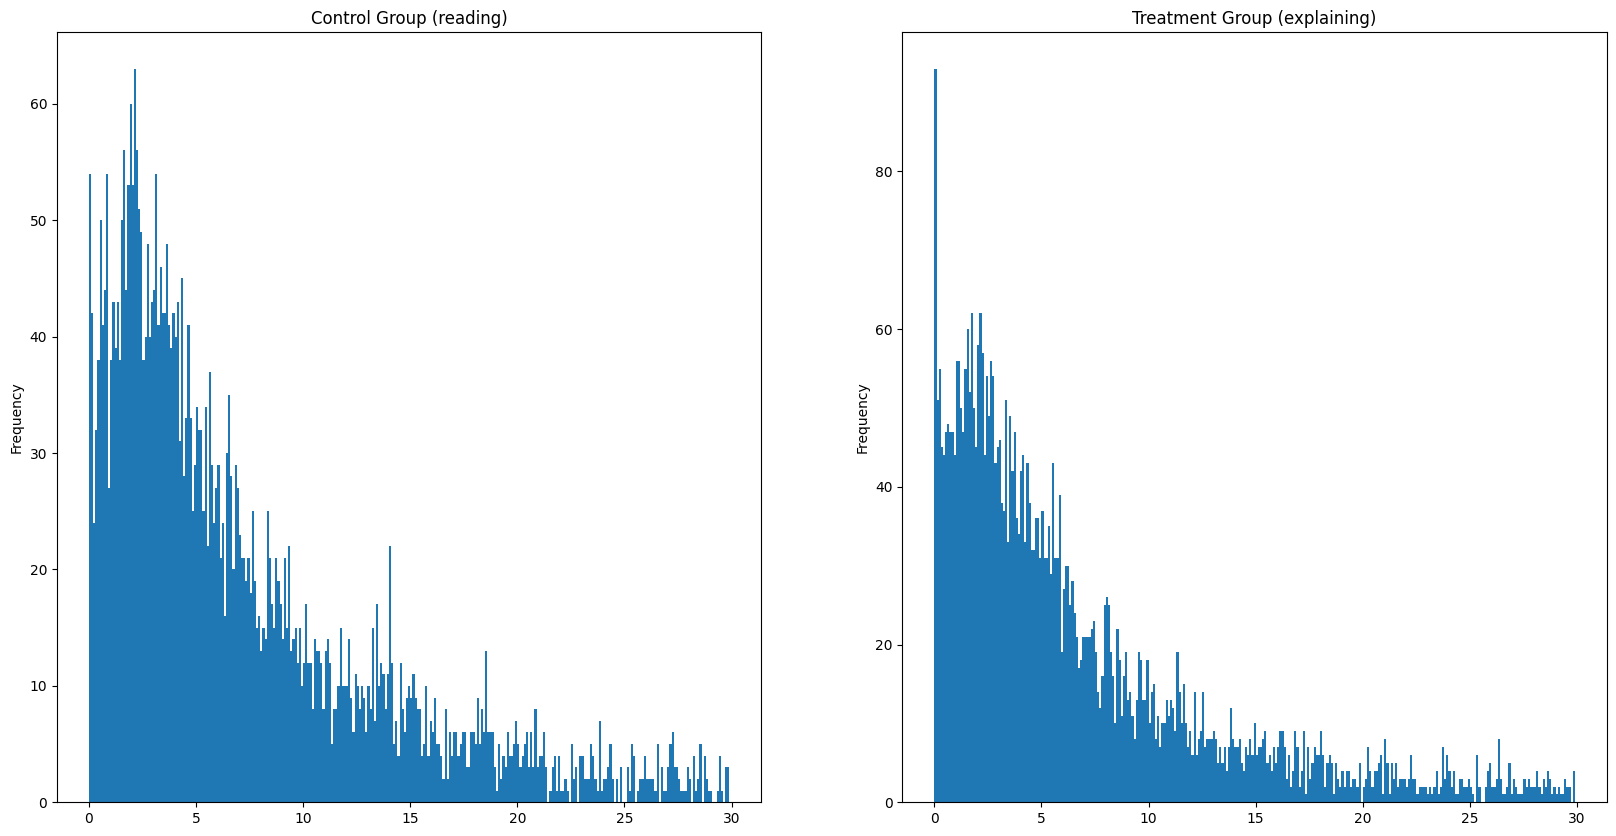

In [25]:
fig, axs = plt.subplots(1,2, figsize=(20, 10))
reading = logs_grouped_quiz_cleantime[logs_grouped_quiz_cleantime["userGroup"] == logs_grouped_quiz_cleantime["controlGroup"]]
expalining = logs_grouped_quiz_cleantime[logs_grouped_quiz_cleantime["userGroup"] != logs_grouped_quiz_cleantime["controlGroup"]]
bins = np.arange(0, 30, 0.1)
reading["timeSpent"].plot(kind="hist", bins=bins, ax=axs[0])
expalining["timeSpent"].plot(kind="hist", bins=bins, ax=axs[1])
axs[0].set_title("Control Group (reading)")
axs[1].set_title("Treatment Group (explaining)")
plt.show()

In [26]:
#Analysis 
print("Reading group")
print(reading["timeSpent"].describe())
print("-"*20)
print("Explaining group")
print(expalining["timeSpent"].describe())


Reading group
count    4275.000000
mean        7.099712
std         6.389516
min         0.066767
25%         2.348776
50%         4.994437
75%         9.869943
max        29.909625
Name: timeSpent, dtype: float64
--------------------
Explaining group
count    4411.000000
mean        6.672376
std         6.405041
min         0.019248
25%         2.085366
50%         4.531067
75%         9.059577
max        29.923447
Name: timeSpent, dtype: float64


In [27]:
stats.ttest_ind(reading["timeSpent"], expalining["timeSpent"], equal_var=False)

TtestResult(statistic=3.1124975223060525, pvalue=0.0018611449561811457, df=8676.755286891637)

TtestResult(statistic=1.4757157377594798, pvalue=0.14005647615390027, df=8683.812933294616)


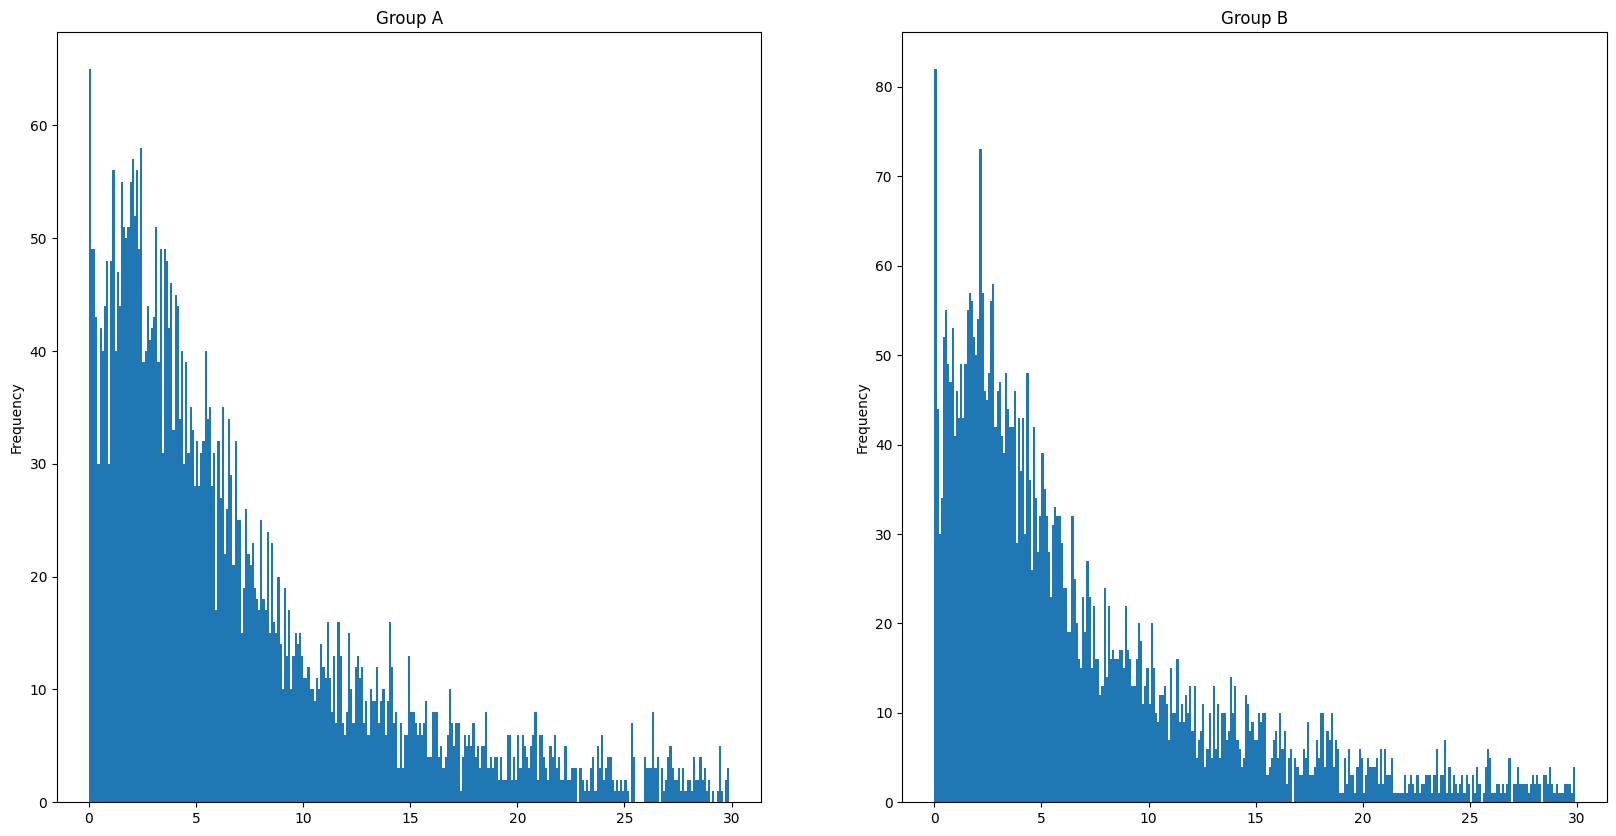

In [28]:
A_group = logs_grouped_quiz_cleantime[logs_grouped_quiz_cleantime["userGroup"] == "A"]
B_group = logs_grouped_quiz_cleantime[logs_grouped_quiz_cleantime["userGroup"] == "B"]
fig, axs = plt.subplots(1,2, figsize=(20, 10))
A_group["timeSpent"].plot(kind="hist", bins=bins, ax=axs[0])
B_group["timeSpent"].plot(kind="hist", bins=bins, ax=axs[1])
axs[0].set_title("Group A")
axs[1].set_title("Group B")

test = stats.ttest_ind(A_group["timeSpent"], B_group["timeSpent"], equal_var=False)
print(test)

Quiz #1 - Merge Sort - Pvalue : 0.23483429937698658
----------------------------------------
Quiz #1 - Insertion Sort - Pvalue : 0.0006428693045001593
Group A
count    217.000000
mean       6.180053
std        5.085054
min        0.083354
25%        2.490925
50%        4.673597
75%        7.714185
max       27.289973
Name: timeSpent, dtype: float64
--------------------
Group B
count    232.000000
mean       4.650263
std        4.274958
min        0.053135
25%        2.106670
50%        3.603379
75%        5.777378
max       28.775657
Name: timeSpent, dtype: float64
----------------------------------------


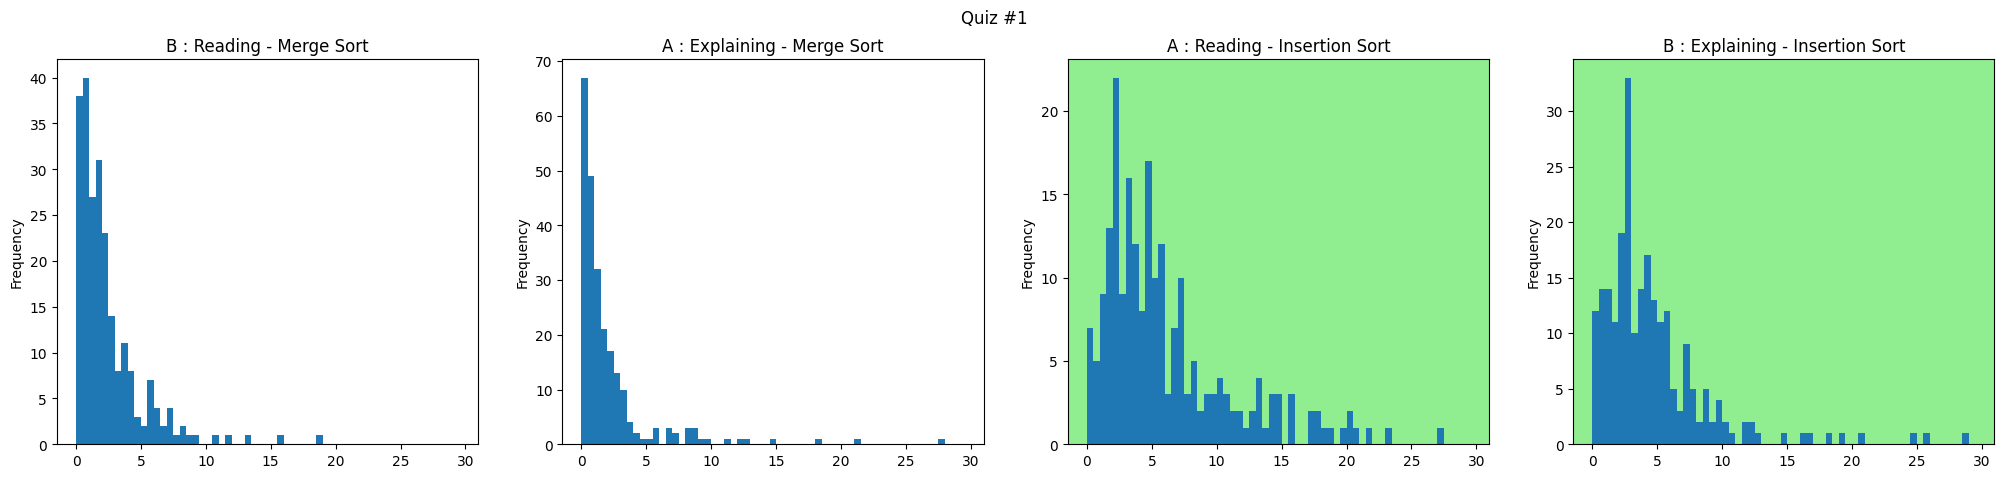

Quiz #2 - Strassen’s Algorithm - Pvalue : 0.47655092284677214
----------------------------------------
Quiz #2 - Maximum Sum Subarray - Pvalue : 0.010327835654840163
Group A
count    224.000000
mean       7.452260
std        5.126602
min        0.186720
25%        3.989793
50%        6.152229
75%        9.844098
max       28.574451
Name: timeSpent, dtype: float64
--------------------
Group B
count    203.000000
mean       8.864538
std        6.095263
min        0.110946
25%        4.121627
50%        7.205212
75%       12.320770
max       28.410007
Name: timeSpent, dtype: float64
----------------------------------------


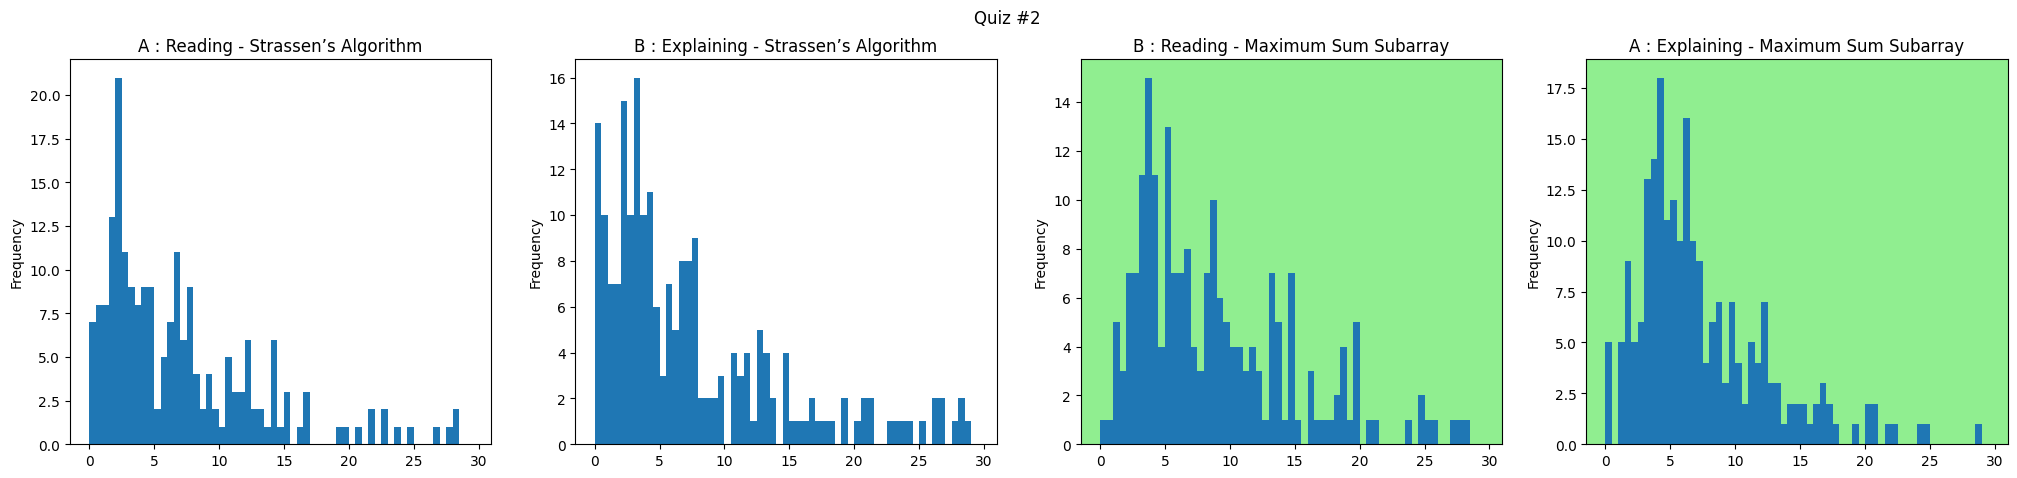

Quiz #3 - Priority Queues - Pvalue : 0.444535611294408
----------------------------------------
Quiz #3 - Heap Sort - Pvalue : 0.5314866297937046
----------------------------------------


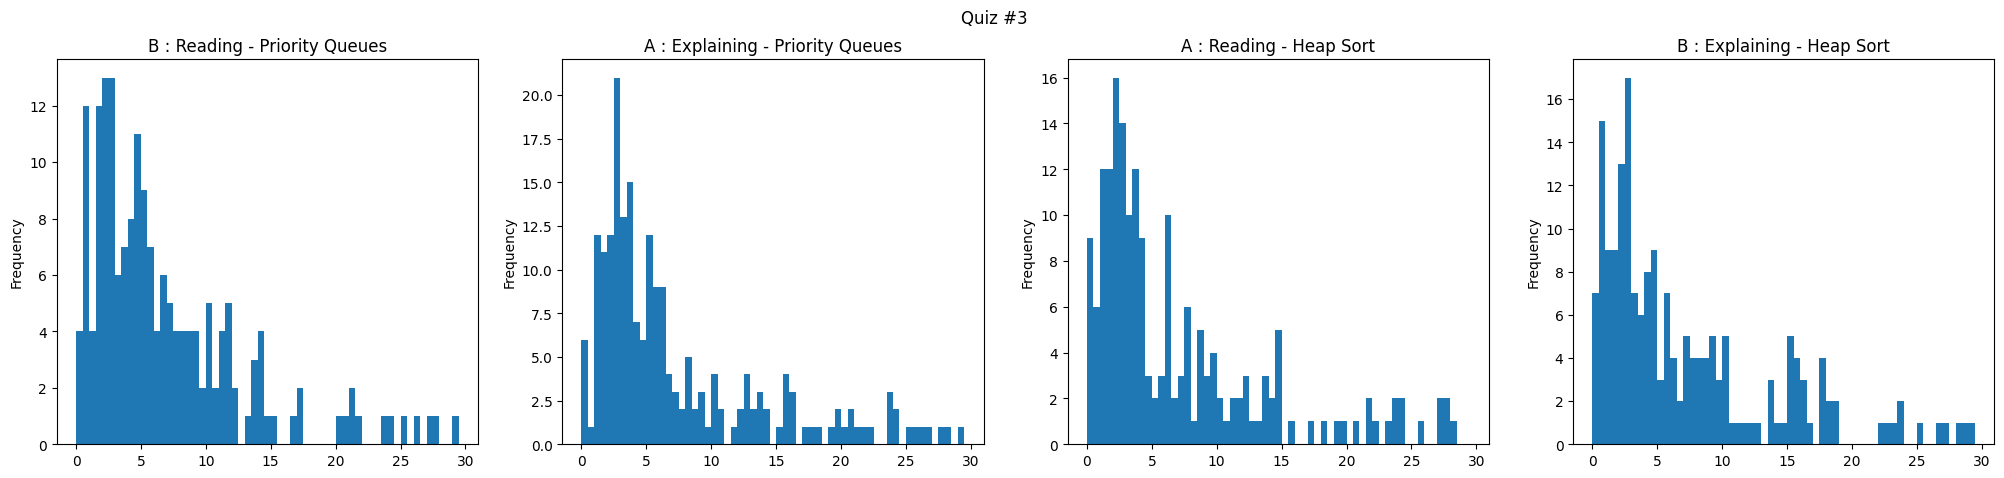

Quiz #4 - Matrix-Chain Multiplication - Pvalue : 0.00016834770631793026
Group A
count    214.000000
mean       4.302168
std        4.334498
min        0.083358
25%        1.873351
50%        3.328505
75%        4.893189
max       29.892155
Name: timeSpent, dtype: float64
--------------------
Group B
count    222.000000
mean       2.944840
std        2.970586
min        0.063140
25%        1.062112
50%        2.083371
75%        3.748997
max       20.896039
Name: timeSpent, dtype: float64
----------------------------------------
Quiz #4 - Rod Cutting - Pvalue : 0.480239975445257
----------------------------------------


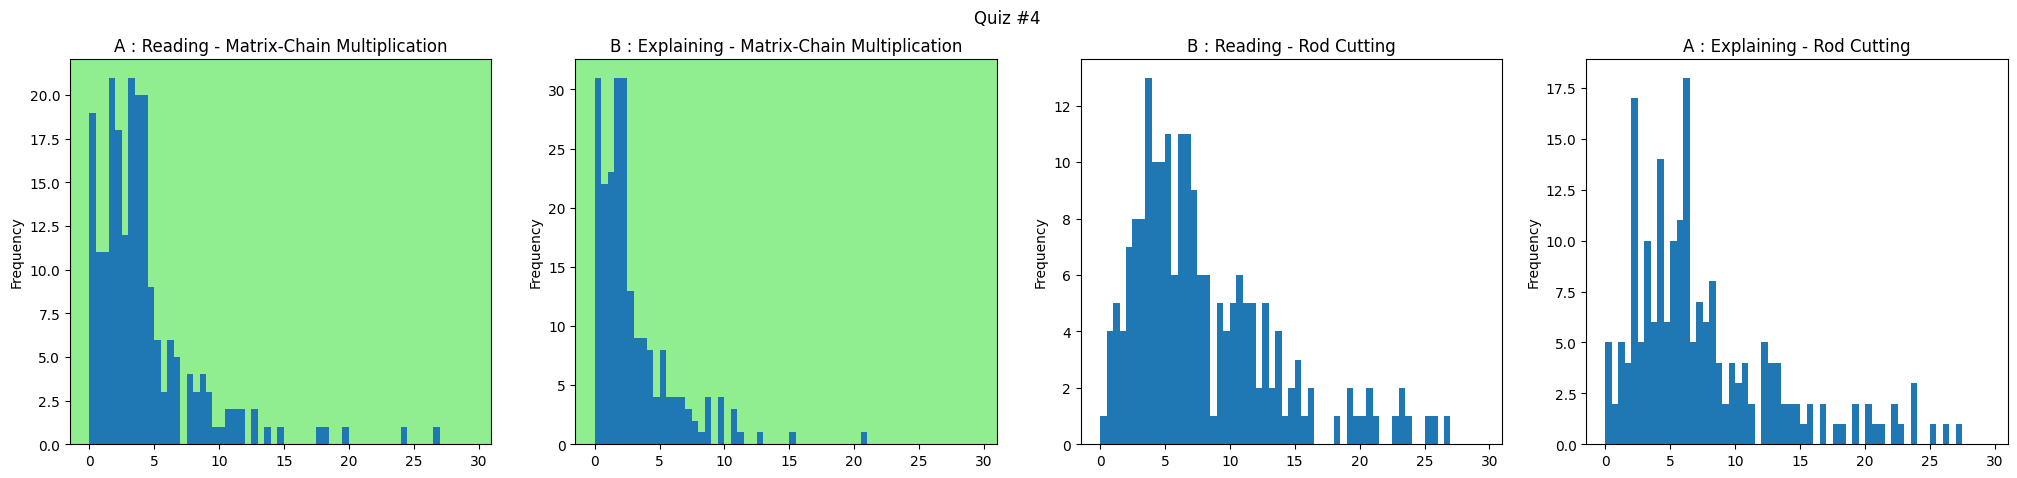

Quiz #5 - Longest Common Subsequence - Pvalue : 0.6139454421755379
----------------------------------------
Quiz #5 - Optimal Binary Search Trees - Pvalue : 0.4271331919725869
----------------------------------------


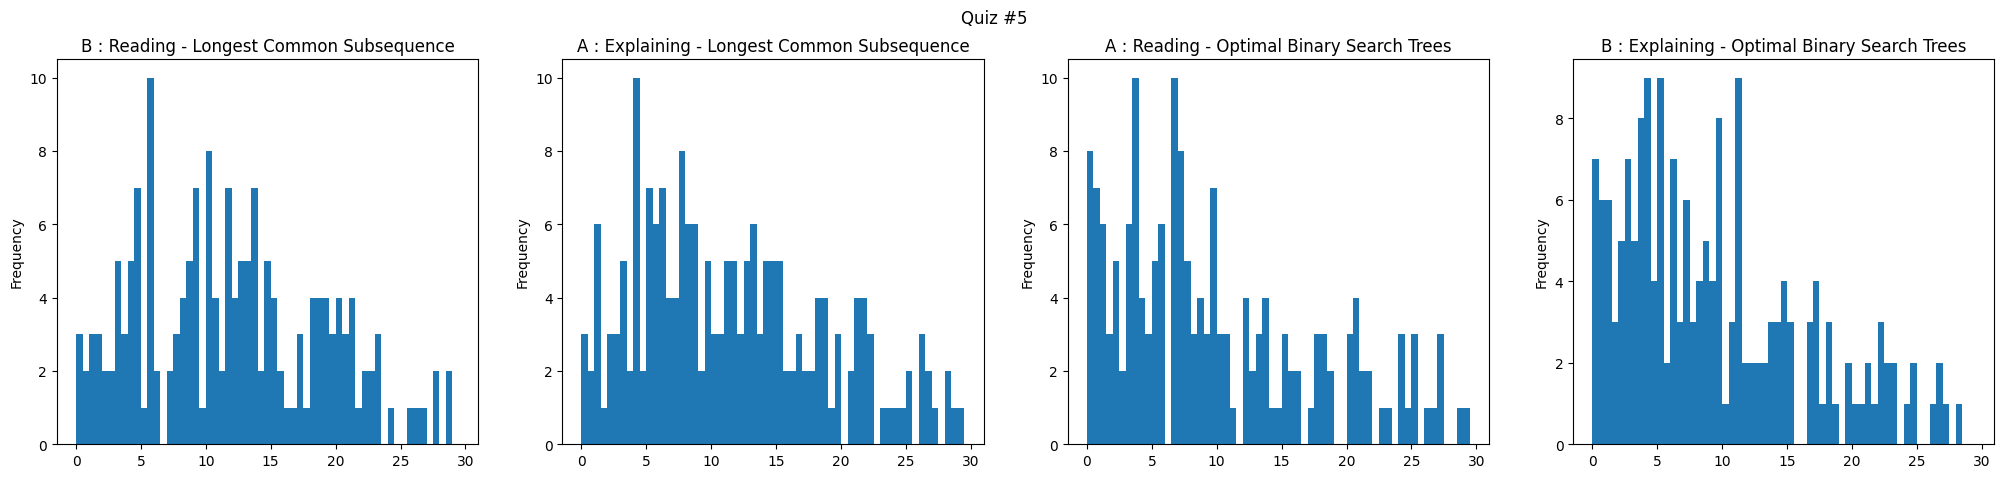

Quiz #6 - Depth-First Search - Pvalue : 0.09685834895929822
----------------------------------------
Quiz #6 - Breadth-First Search - Pvalue : 0.1557020149250206
----------------------------------------


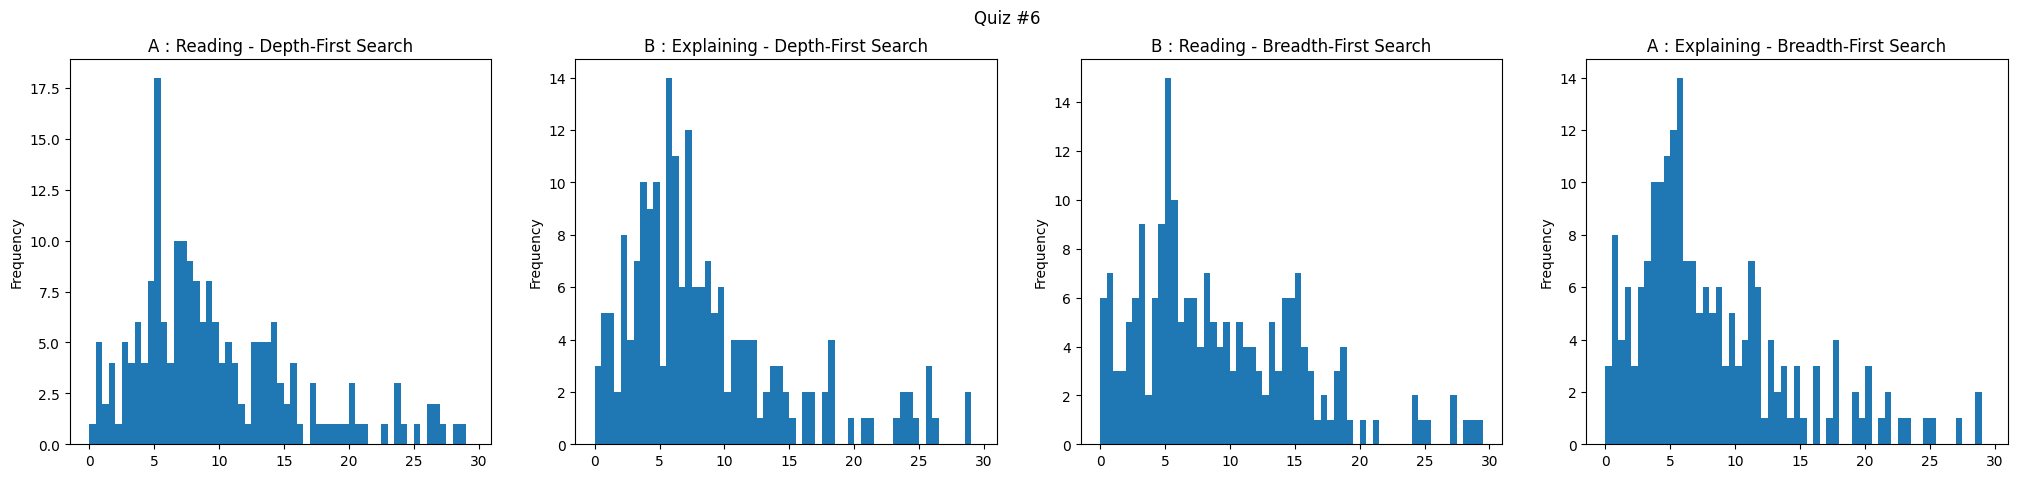

Quiz #7 - Ford-Fulkerson Algorithm - Pvalue : 0.6168094724855128
----------------------------------------
Quiz #7 - Topological Sorting - Pvalue : 0.39693385627899413
----------------------------------------


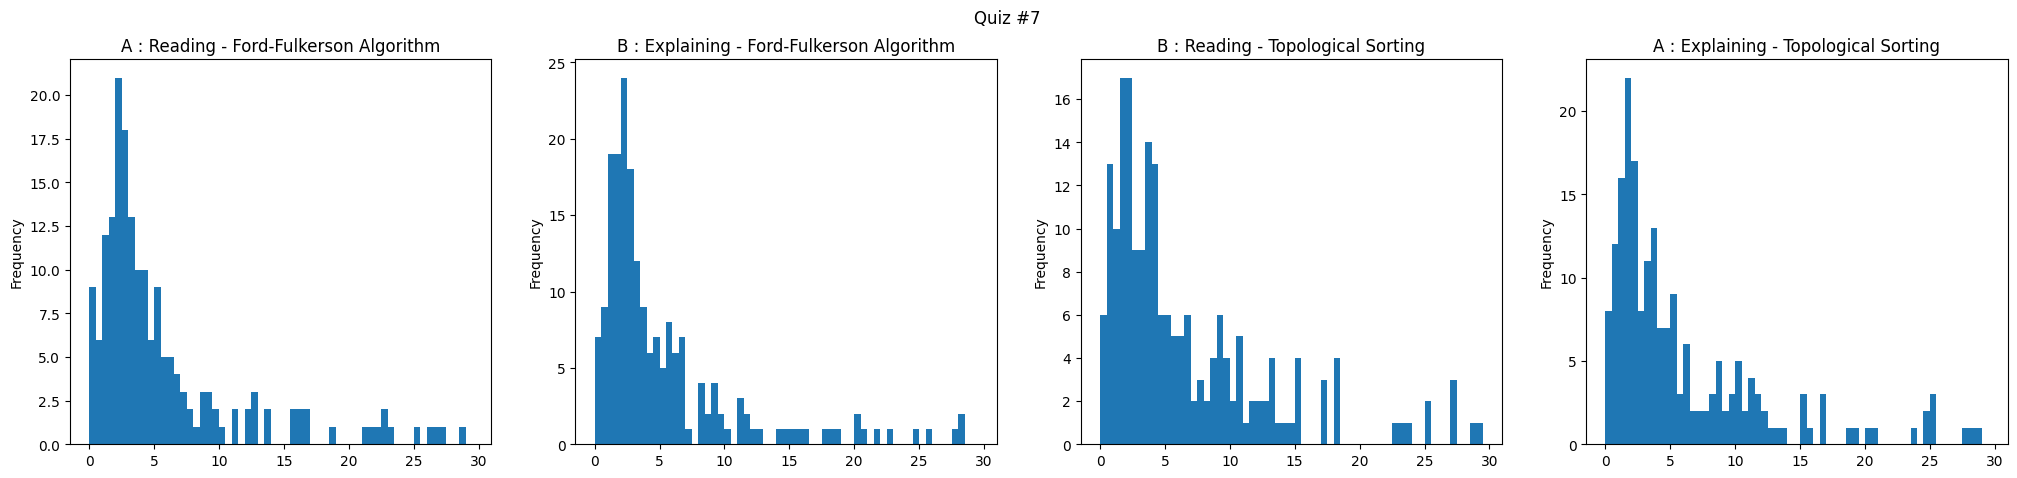

Quiz #8 - Bipartite Matching via Max Flow - Pvalue : 0.7944233508071886
----------------------------------------
Quiz #8 - Edge disjoint paths via max flow - Pvalue : 0.9556516769217762
----------------------------------------


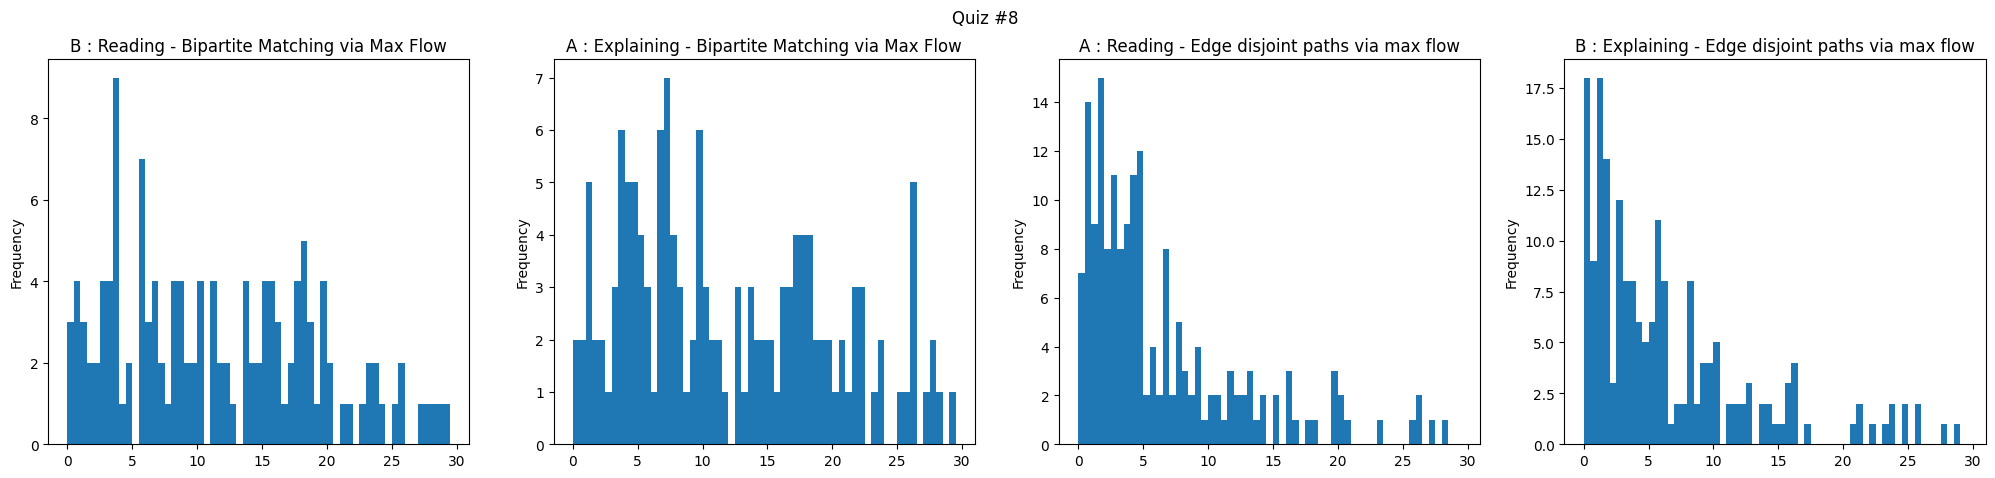

Quiz #9 - Kruskal's algorithm - Pvalue : 0.15387527900397
----------------------------------------
Quiz #9 - Prim's Algorithm - Pvalue : 0.030964927241458898
Group A
count    202.000000
mean       5.827900
std        5.912128
min        0.083351
25%        1.874368
50%        3.812703
75%        7.491203
max       29.844583
Name: timeSpent, dtype: float64
--------------------
Group B
count    200.000000
mean       4.697802
std        4.455384
min        0.083346
25%        1.819521
50%        3.355576
75%        6.166841
max       23.879077
Name: timeSpent, dtype: float64
----------------------------------------


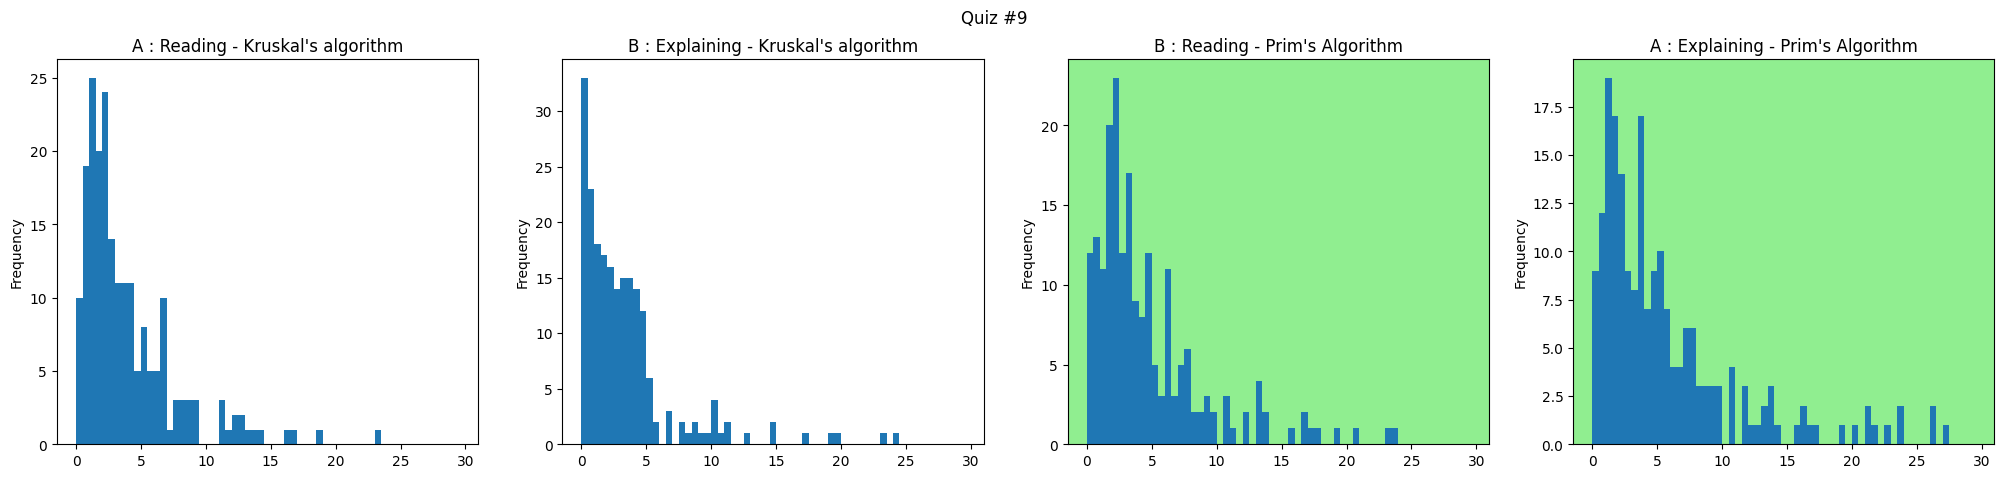

Quiz #10 - Dijkstra - Pvalue : 0.0001142718514796862
Group A
count    217.000000
mean       5.610318
std        5.166731
min        0.066767
25%        1.957408
50%        4.379695
75%        7.395297
max       28.795768
Name: timeSpent, dtype: float64
--------------------
Group B
count    207.000000
mean       3.924582
std        3.640280
min        0.068627
25%        1.695667
50%        2.856885
75%        5.025203
max       21.621681
Name: timeSpent, dtype: float64
----------------------------------------
Quiz #10 - Bellman-Ford - Pvalue : 0.46492231286638497
----------------------------------------


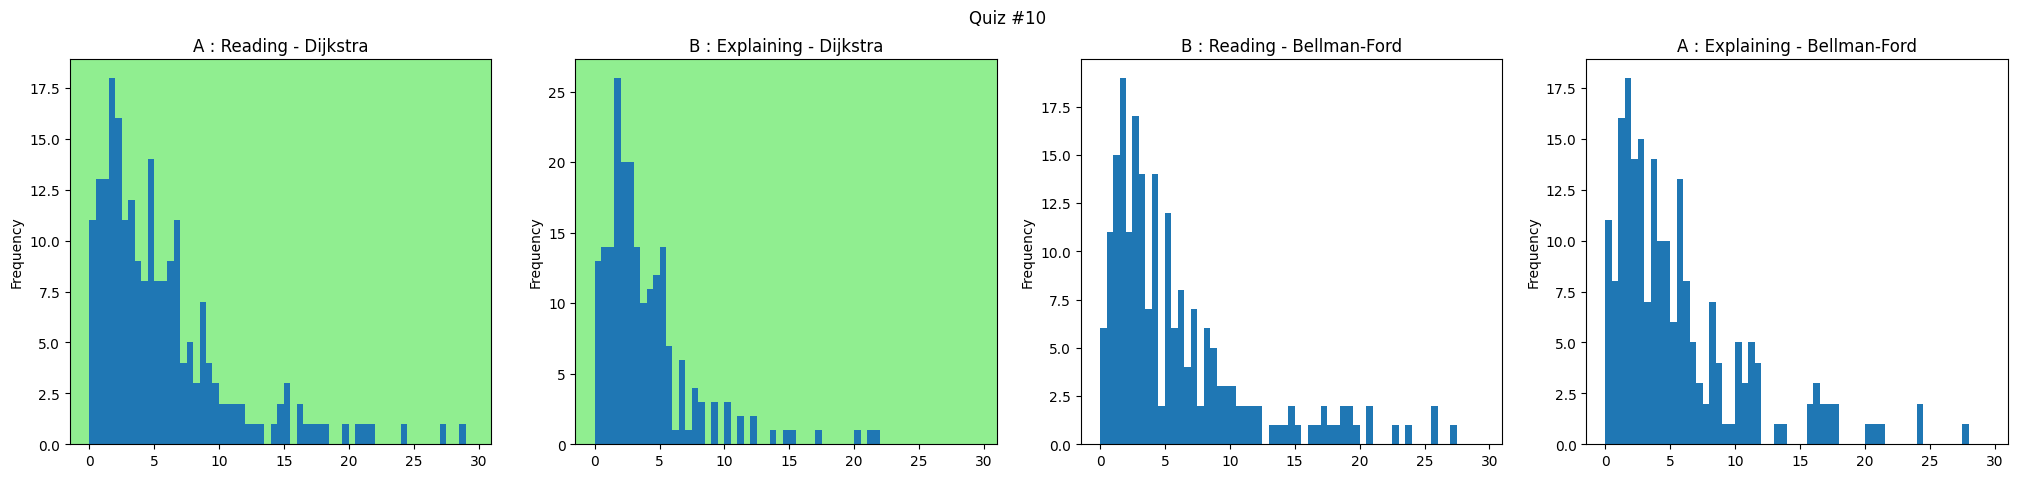

Quiz #11 - Quicksort - Pvalue : 0.8047016746077801
----------------------------------------
Quiz #11 - Hash Tables - Pvalue : 0.9703857476000127
----------------------------------------


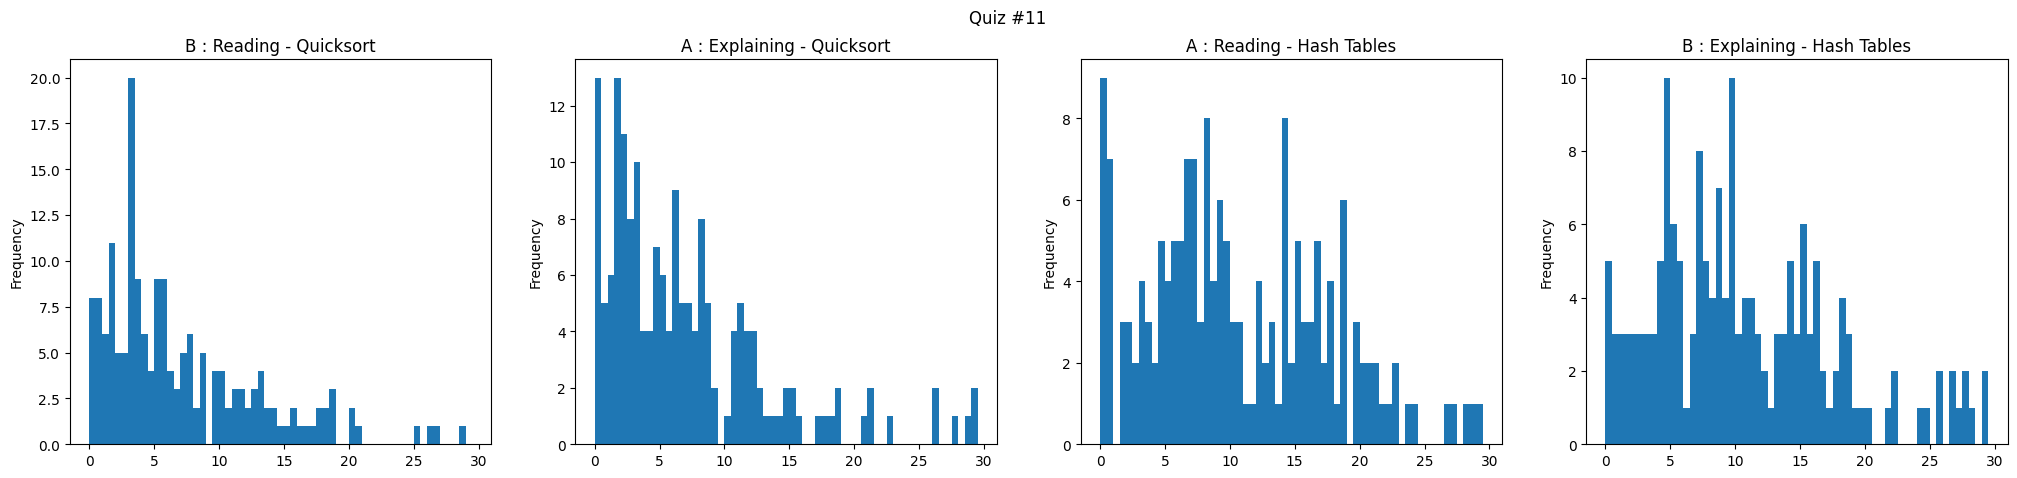

In [29]:
#A/B analysis per week
for week in order:
    group_a = logs_grouped_quiz_cleantime[(logs_grouped_quiz["userGroup"] == "A") & (logs_grouped_quiz["week"] == week)]
    group_b = logs_grouped_quiz_cleantime[(logs_grouped_quiz["userGroup"] == "B") & (logs_grouped_quiz["week"] == week)]
    exercise_list = group_a["exerciseName"].unique()
    fig, axs = plt.subplots(1,len(exercise_list)*2, figsize=(25, 5))
    fig.suptitle(f"{week}")
    for i,exo in enumerate(exercise_list):
        bins = np.arange(0, 30, 0.5)
        cg = group_a[group_a["exerciseName"] == exo]["controlGroup"].values[0]
        if cg == "A":
            index = 0
            axs[i*2].set_title(f"A : Reading - {exo}")
            axs[i*2+1].set_title(f"B : Explaining - {exo}")
        else:
            index = 1
            axs[i*2+1].set_title(f"A : Explaining - {exo}")
            axs[i*2].set_title(f"B : Reading - {exo}")
        group_a[group_a["exerciseName"] == exo]["timeSpent"].plot(kind="hist", bins=bins, ax=axs[index+i*2])
        group_b[group_b["exerciseName"] == exo]["timeSpent"].plot(kind="hist", bins=bins, ax=axs[1-index+i*2])
        ttest = stats.ttest_ind(group_a[group_a["exerciseName"] == exo]["timeSpent"], group_b[group_b["exerciseName"] == exo]["timeSpent"], equal_var=False)
        print(f"{week} - {exo} - Pvalue : {ttest.pvalue}")
        if ttest.pvalue < 0.05:
            axs[i*2].set_facecolor('lightgreen')
            axs[i*2+1].set_facecolor('lightgreen')
            print("Group A")
            print(group_a[group_a["exerciseName"] == exo]["timeSpent"].describe())
            print("-"*20)
            print("Group B")
            print(group_b[group_b["exerciseName"] == exo]["timeSpent"].describe())
        print("-"*40)

    plt.show()

    


## Message analysis

In [30]:
print(logs_grouped.shape)
logs_grouped.head()

(154002, 14)


,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,exerciseName,controlGroup,userGroup,week
0,2024-05-11 15:56:52.688503174,k570005nhp144860betwtwy7v56rx64m,j571kc5p8ah7yvj1xhng7nzpgs6rxy2m,k179wpzex0za69rx2wyv02e9hd6rj4fb,attemptStarted,js71tk2nax2wvs97m3vgc5erp16mds09,reading,NaN,NaN,NaN,Kruskal's algorithm,A,A,Quiz #9
1,2024-04-16 08:00:01.116921631,k57000a4rv5wgy13d63pqyt51s6qb2vv,j57adjsev6qjazakv9p4ad7qwh6qany3,k1710bmgh2mwgaqv7sjkmmfh1x6pveqf,quizSubmission,js7ese808vctnr15sy1te2pvx96mndmx,explain,"{'answers': [2.0, 0.0, 2.0], 'correctness': 1....",NaN,NaN,Optimal Binary Search Trees,A,B,Quiz #5
2,2024-05-20 16:28:14.092592285,k57000d308fpr45yqrprf6wrs56see5h,j572qtbd19x89mraje17mmj30x6sen0s,k176kkt806khrpxnctb9hczm316rtsrq,quizSubmission,js78b7hq6r6pk2c0mm9d2he91s6mjb8v,reading,"{'answers': [2.0, 3.0, 0.0], 'correctness': 1....",NaN,NaN,Dijkstra,A,A,Quiz #10
3,2024-04-18 08:10:36.998193848,k57000m99awdk4jw41cjfe4jkn6qf1jj,j572w733907q5k2w0kkk4a19z96qfaec,k171kqa60g6a9qpm0f0jv07wn16ptnr1,quizSubmission,js7e56b2v2t5nacr7e4n8dnn3d6mb606,explain,"{'answers': [0.0, 1.0, 1.0], 'correctness': 0....",NaN,NaN,Breadth-First Search,B,A,Quiz #6
4,2024-03-13 16:35:30.072217773,k57000mdpmrfm67q4eymvsbqns6n6ezf,j571e3e401tqj2mag6mjgrcynx6n7t96,k1715d99fyvzt35jfm2638g3nd6n35z3,exerciseCompleted,js7534h7gnm8pmyem0n6ttdb816mb94w,explain,NaN,NaN,NaN,Heap Sort,A,B,Quiz #3


In [31]:
#Analysis of the number of messages
logs_grouped_messages = logs_grouped.copy()
logs_grouped_messages = logs_grouped_messages[logs_grouped_messages["type"].isin(["messageSent", "answerGenerated","exerciseCompleted"])]
logs_grouped_messages["type"].value_counts()

type
messageSent          43154
answerGenerated      37549
exerciseCompleted     5142
Name: count, dtype: int64

In [32]:
logs_grouped_messages["n_sent"] = logs_grouped_messages.groupby(["userId", "exerciseName"])["type"].transform(lambda x: (x == "messageSent").sum())
logs_grouped_messages["n_sent"]= logs_grouped_messages["n_sent"].fillna(0).astype(int)

logs_grouped_messages["n_received"] = logs_grouped_messages.groupby(["userId", "exerciseName"])["type"].transform(lambda x: (x == "answerGenerated").sum())
logs_grouped_messages["n_received"]= logs_grouped_messages["n_received"].fillna(0).astype(int)

logs_grouped_messages["n_mess"] = logs_grouped_messages["n_sent"] + logs_grouped_messages["n_received"]
logs_grouped_messages


,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,exerciseName,controlGroup,userGroup,week,n_sent,n_received,n_mess
4,2024-03-13 16:35:30.072217773,k57000mdpmrfm67q4eymvsbqns6n6ezf,j571e3e401tqj2mag6mjgrcynx6n7t96,k1715d99fyvzt35jfm2638g3nd6n35z3,exerciseCompleted,js7534h7gnm8pmyem0n6ttdb816mb94w,explain,NaN,NaN,NaN,Heap Sort,A,B,Quiz #3,6,5,11
5,2024-03-28 16:24:01.600864014,k57000ny7w4g28vjeeyb9x8se16p55f9,j578ec52hh90fvkmk132x6ege96p45ba,k17asvnfeyp3q949hdkwjq2and6p2x6e,answerGenerated,js7984yjpe01cj1761gygtt3dx6mafdh,explain,NaN,jd7b55hm5qjm0196n9rt6jyh7n6p581t,jd70y58gcaafd916x0rfp0ygsh6p4b7a,Matrix-Chain Multiplication,A,B,Quiz #4,8,7,15
9,2024-04-04 13:43:46.323182861,k57000x8jdvr4gjsm2p0ey1bms6pj2vt,j57en6wxxqtd4x169vt90y9zdh6pkyh4,k1779x2fet2p0zkazg66nvfcjh6p2vbm,messageSent,js73xpgsqcv0gmv0g1w7as97rd6me4c0,explain,NaN,jd747sa89e37hf86z054b67wjx6pk19t,jd7b6sqaqbmgvxc1b14sr4rewn6pj0sj,Rod Cutting,B,A,Quiz #4,9,8,17
10,2024-04-07 10:08:21.862825195,k5700154f6etndhepqx0rstrkn6pr0xk,j573anryyjzgxm9rcpdm6t9bys6psp8s,k17asvnfeyp3q949hdkwjq2and6p2x6e,messageSent,js74xtqm1gax5zqzszz0yrnfss6mekyy,explain,NaN,jd75ge56tp37t39fp4pw04mmcx6ps3s9,jd71yw479qb2cp2xv2k5b7z1n16psack,Matrix-Chain Multiplication,A,B,Quiz #4,9,8,17
12,2024-04-22 09:28:34.208699707,k570015f8vcye8mbv9tb6w8hv96qpwq6,j57e15s47pzdb00vn5057zr6md6qq4aq,k17aatn2xs5xgqg6cgcjm1tqcn6q0cw7,messageSent,js71v2af0tfkjx57xy21wqhyyx6md2et,explain,NaN,jd71n1g8c1pd1vb0vgq841h0356qp18w,jd7dvv02ctfyw1p9ns9bd635j16qpydg,Depth-First Search,A,B,Quiz #6,6,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153994,2024-04-17 20:09:57.378344482,k57fzz34c1ydkwt8w5648c7vxd6qd046,j57edg5teg7haqdw3y6jgtenkh6qcrfh,k17aatn2xs5xgqg6cgcjm1tqcn6q0cw7,answerGenerated,js72e99j78d0thce52z0w0594n6mbthj,explain,NaN,jd78jkknjzt33tmdx099zvtq1s6qc40m,jd76n4y5xnmpd32k0cctyb2mxx6qcesb,Depth-First Search,A,B,Quiz #6,10,9,19
153995,2024-04-28 15:58:08.244800537,k57fzz4xh4a5j78rbrhpctvyxs6r2dh9,j574ym30w3hmatzk704wf785fx6r2ett,k172p4g9eanfgsgtkjg0sn49916qgwh4,answerGenerated,js7f8p4456h8p3f9am33n8p3f56mc1k2,explain,NaN,jd7btft8ad0g2v5j93jkz1qyw16r2xgb,jd709bqe9abqhft932cd7rymyn6r3qwj,Topological Sorting,B,A,Quiz #7,9,8,17
153997,2024-04-04 09:59:25.539958252,k57fzzawztspx74s56dd8v9g7h6pkea6,j57cq176xgq49ebe4hq4ec4bb96pjfc1,k17asvnfeyp3q949hdkwjq2and6p2x6e,messageSent,js7ejegwwy13npt4t5xmxfaze16mf7wj,explain,NaN,jd765cr60qe2ygzfqsgq9950996pj5fm,jd77rttn3djr1548bzs6jp24hs6pkmyv,Matrix-Chain Multiplication,A,B,Quiz #4,7,6,13
153999,2024-05-06 22:05:16.395833740,k57fzzdgj1jvxwbbb443hfkej96rkktd,j57ck5p09yecbjpse269svw8eh6rkapf,k1768n9arfqk6vpqtsaxgs3m156qx8mp,messageSent,js77jjffzjf9pskspa6hh9sknh6ma65a,explain,NaN,jd764p5pff8zfxjf67f3rb2rgn6rj0xv,jd7920e1qrchh4fj403hjw9xj16rkyqt,Edge disjoint paths via max flow,A,B,Quiz #8,13,12,25


In [33]:
logs_grouped_messages["finish_time"] = logs_grouped_messages[logs_grouped_messages["type"]=="exerciseCompleted"]["_creationTime"]
logs_grouped_messages["start_time"] = logs_grouped_messages.sort_values("_creationTime").groupby(["userId", "exerciseName"])["_creationTime"].transform("min")
logs_grouped_messages["time_spent"] = (logs_grouped_messages["finish_time"] - logs_grouped_messages["start_time"]).dt.total_seconds()/60

In [34]:
# logs_grouped_messages_drop = logs_grouped_messages.drop_duplicates(subset=["userId", "exerciseName"])
logs_grouped_messages_drop = logs_grouped_messages.query("type == 'exerciseCompleted'")
logs_grouped_messages_drop.head()

,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,exerciseName,controlGroup,userGroup,week,n_sent,n_received,n_mess,finish_time,start_time,time_spent
4,2024-03-13 16:35:30.072217773,k57000mdpmrfm67q4eymvsbqns6n6ezf,j571e3e401tqj2mag6mjgrcynx6n7t96,k1715d99fyvzt35jfm2638g3nd6n35z3,exerciseCompleted,js7534h7gnm8pmyem0n6ttdb816mb94w,explain,NaN,NaN,NaN,Heap Sort,A,B,Quiz #3,6,5,11,2024-03-13 16:35:30.072217773,2024-03-13 16:32:17.567504395,3.208412
14,2024-05-21 08:07:15.249278809,k57001dz6as5pft43vexeg069n6shdy8,j57eayxtbg1e22v1s9yk7me2zh6sh4m7,k177dxhnpwwtrq9dy5770jmrwx6rvzrr,exerciseCompleted,js76m5g9wh37e6px2tyb5psbvx6mg0tp,explain,NaN,NaN,NaN,Bellman-Ford,B,A,Quiz #10,6,5,11,2024-05-21 08:07:15.249278809,2024-05-21 08:04:55.286880615,2.332707
24,2024-04-17 11:31:55.666209717,k57002bxkbhn3xaj4rjsfpdp9d6qc0bn,j57a3tpmvs51dbzneh2m1309bh6qdkf8,k171kqa60g6a9qpm0f0jv07wn16ptnr1,exerciseCompleted,js788ecjy0bjd2azdgf9x43yk96mdat0,explain,NaN,NaN,NaN,Breadth-First Search,B,A,Quiz #6,10,9,19,2024-04-17 11:31:55.666209717,2024-04-17 09:03:17.297376221,148.639481
61,2024-04-23 10:36:35.283729736,k5700614q3cbxct449tpkhtmrd6qr3wz,j57ez0xkm2mtz1fdvktvz6mbh16qrx68,k17aatn2xs5xgqg6cgcjm1tqcn6q0cw7,exerciseCompleted,js73t5rvpr3a90mdxdd8yvrzkn6mmp42,explain,NaN,NaN,NaN,Depth-First Search,A,B,Quiz #6,14,13,27,2024-04-23 10:36:35.283729736,2024-04-22 22:24:43.997249756,731.854775
62,2024-03-17 07:20:21.786651855,k57006c0m2f7cb8q6yt7cvfe1d6nfrz5,j577rvvg108ms7y86n71ra8w956nfnzj,k173an7ns7g76j493paexdh88d6n3bsh,exerciseCompleted,js75xfp2h55x14p9g4zhf2azw56mfxby,explain,NaN,NaN,NaN,Priority Queues,B,A,Quiz #3,10,9,19,2024-03-17 07:20:21.786651855,2024-03-17 07:12:57.335328369,7.407522


<Axes: ylabel='Frequency'>

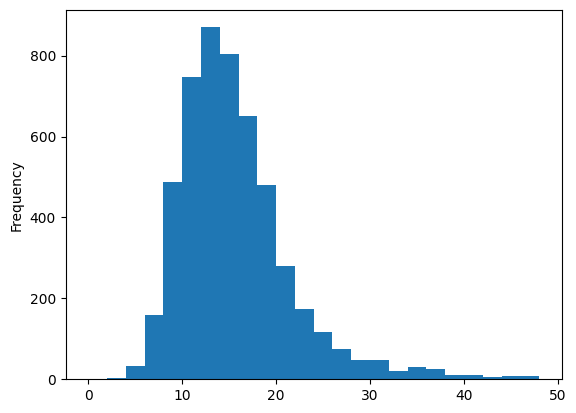

In [35]:
bins_m = np.arange(0, 50, 2)
logs_grouped_messages_drop.query("n_mess < 50")["n_mess"].plot(kind="hist",bins=bins_m)

In [36]:
logs_grouped_messages_drop.query("n_mess < 50")["n_mess"].describe() 

count    5092.000000
mean       15.602907
std         5.972817
min         3.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        49.000000
Name: n_mess, dtype: float64

count    2563.000000
mean       16.019508
std         5.889465
min         3.000000
25%        13.000000
50%        15.000000
75%        19.000000
max        46.000000
Name: n_mess, dtype: float64
--------------------
count    2529.000000
mean       15.180704
std         6.027968
min         3.000000
25%        11.000000
50%        13.000000
75%        17.000000
max        49.000000
Name: n_mess, dtype: float64


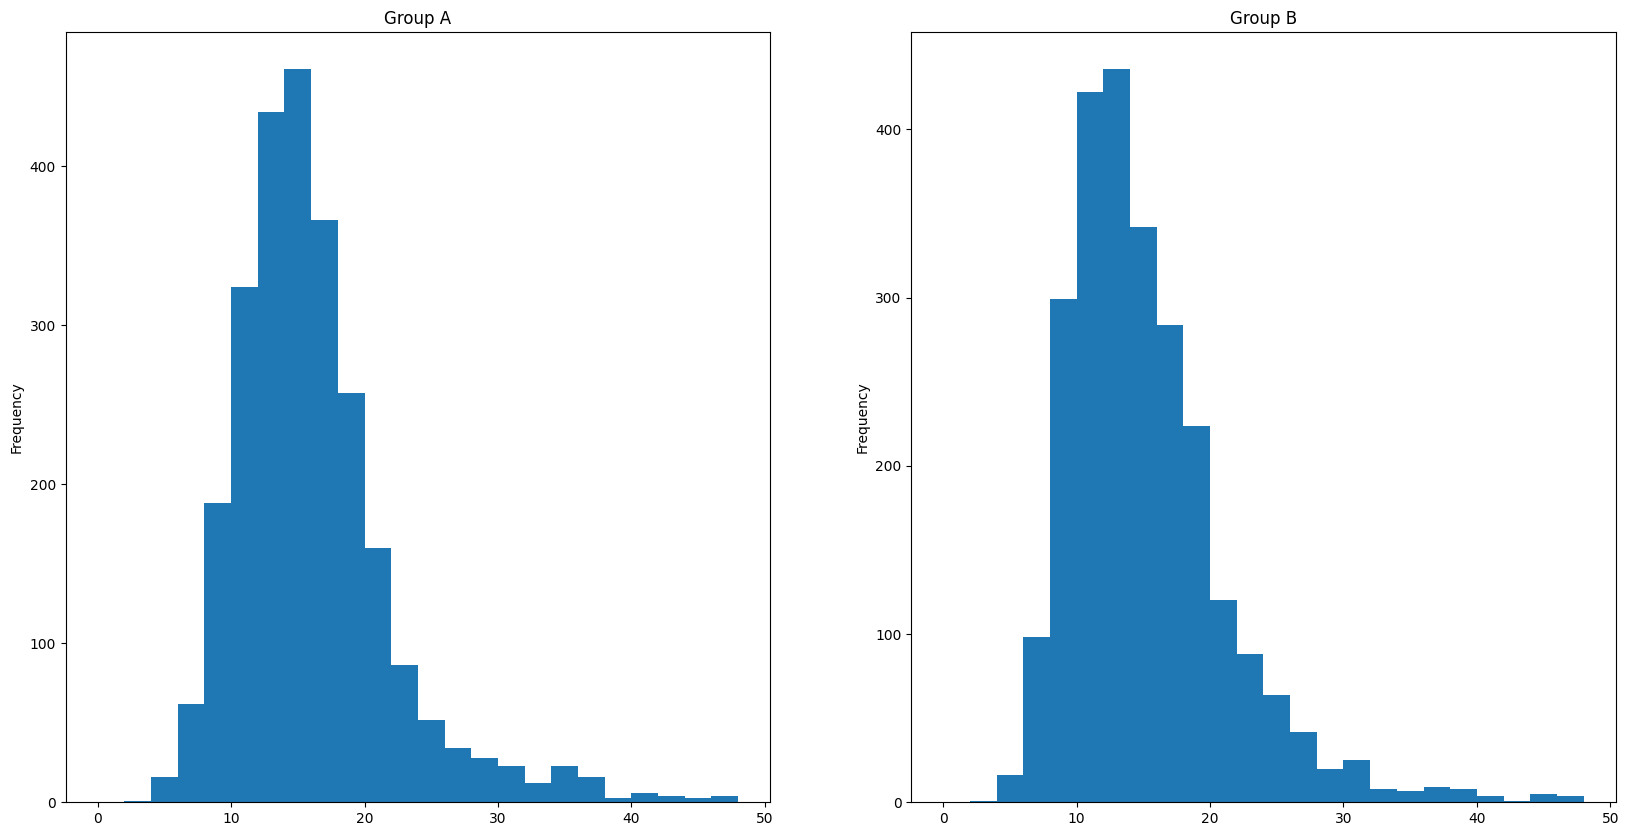

TtestResult(statistic=5.021685816553509, pvalue=5.297064430568664e-07, df=5083.193113992944)


In [37]:
group_a = logs_grouped_messages_drop[logs_grouped_messages_drop["userGroup"] == "A"].query("n_mess < 50")
group_b = logs_grouped_messages_drop[logs_grouped_messages_drop["userGroup"] == "B"].query("n_mess < 50")
print(group_a["n_mess"].describe())
print("-"*20)
print(group_b["n_mess"].describe())
fig, axs = plt.subplots(1,2, figsize=(20, 10))
group_a["n_mess"].plot(kind="hist", bins=bins_m, ax=axs[0])
group_b["n_mess"].plot(kind="hist", bins=bins_m, ax=axs[1])

axs[0].set_title("Group A")
axs[1].set_title("Group B")
plt.show()
print(stats.ttest_ind(group_a["n_mess"], group_b["n_mess"], equal_var=False))

Quiz #1 - Pvalue : 0.0008590784871463067
Group A
24.3206106870229
Group B
17.07171314741036
----------------------------------------
Quiz #2 - Pvalue : 4.2653082315300085e-09
Group A
16.38095238095238
Group B
12.510729613733906
----------------------------------------
Quiz #3 - Pvalue : 6.35240096329333e-10
Group A
17.235042735042736
Group B
12.891774891774892
----------------------------------------
Quiz #4 - Pvalue : 0.9870495968989478
----------------------------------------
Quiz #5 - Pvalue : 0.07359608117019581
----------------------------------------
Quiz #6 - Pvalue : 0.9696431534900709
----------------------------------------
Quiz #7 - Pvalue : 0.003940410389034726
Group A
14.830985915492958
Group B
16.859154929577464
----------------------------------------
Quiz #8 - Pvalue : 0.09958853077267361
----------------------------------------
Quiz #9 - Pvalue : 0.6666936733401988
----------------------------------------
Quiz #10 - Pvalue : 0.0015123827987476596
Group A
14.12389380530

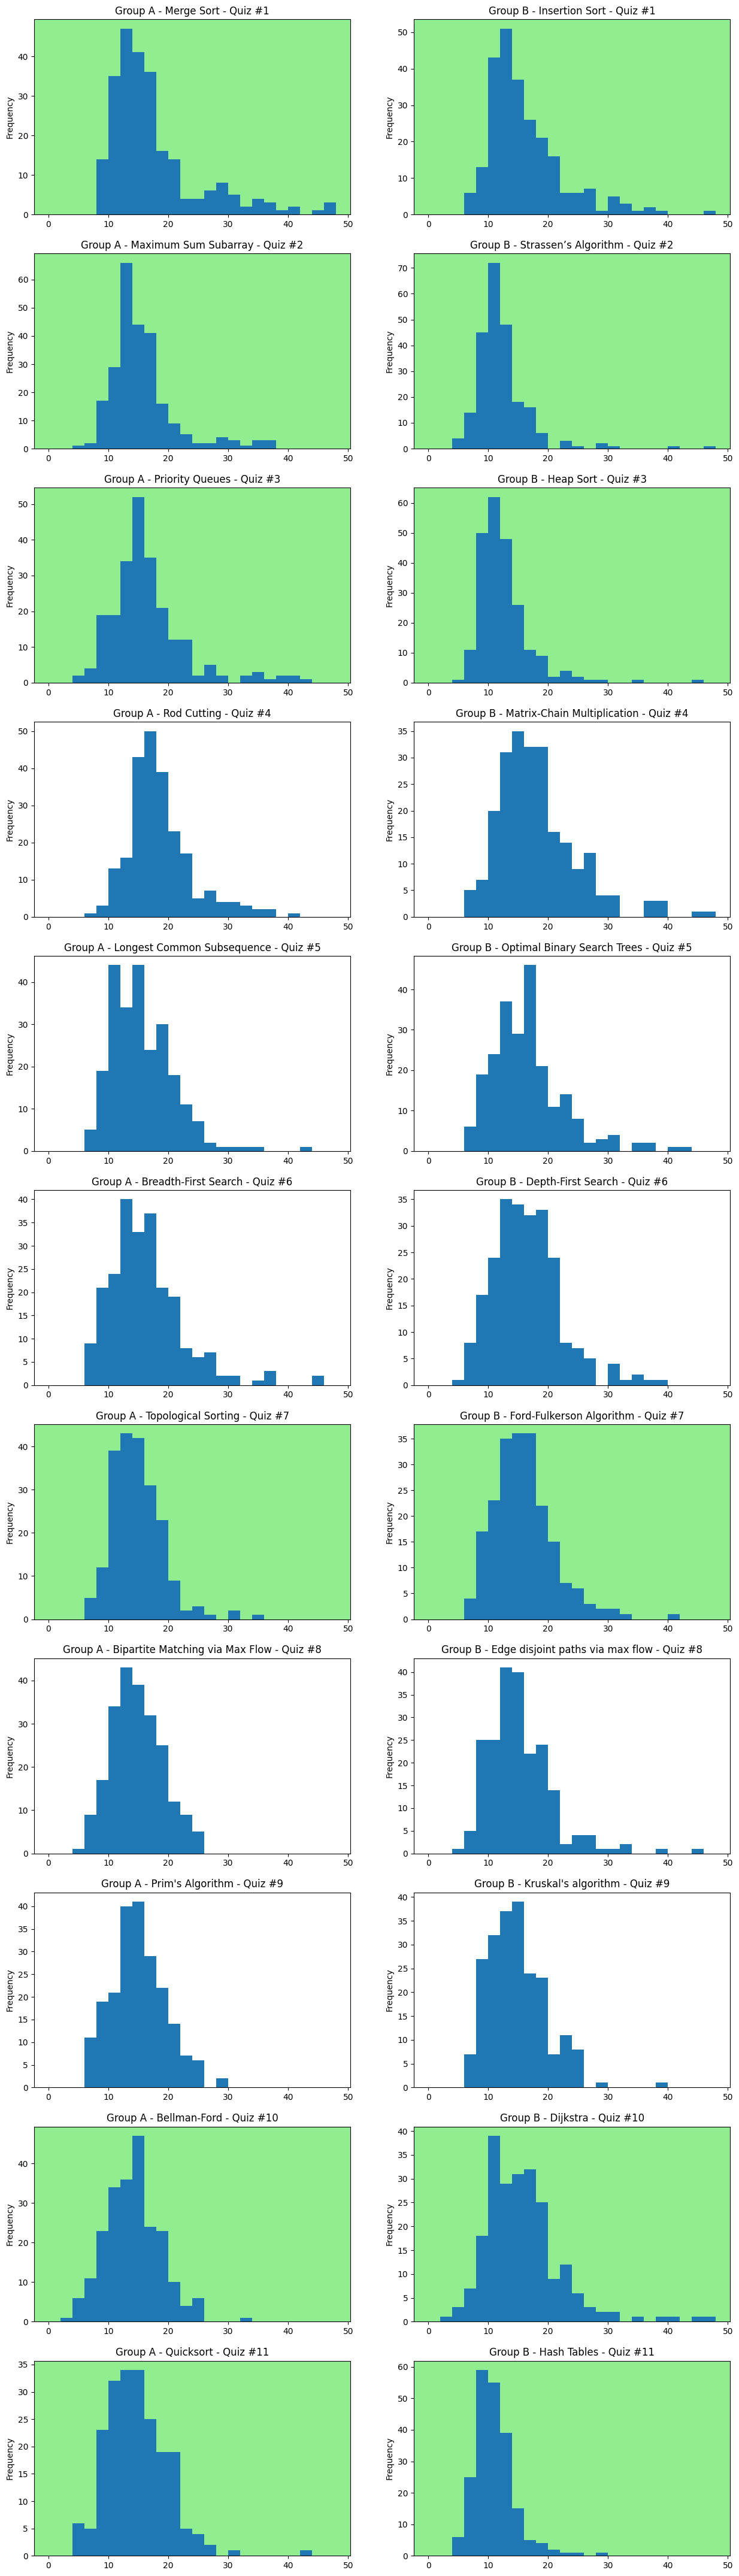

In [38]:
#number of message per week
fig, axs = plt.subplots(len(order),2, figsize=(15, 55))
for i,week in enumerate(order):
    group_a = logs_grouped_messages_drop[(logs_grouped_messages_drop["userGroup"] == "A") & (logs_grouped_messages_drop["week"] == week)]
    group_b = logs_grouped_messages_drop[(logs_grouped_messages_drop["userGroup"] == "B") & (logs_grouped_messages_drop["week"] == week)]
    bins = np.arange(0, 50, 2)
    group_a["n_mess"].plot(kind="hist", bins=bins, ax=axs[i,0])
    group_b["n_mess"].plot(kind="hist", bins=bins, ax=axs[i,1])
    axs[i,0].set_title("Group A - "+group_a["exerciseName"].values[0]+" - "+week)
    axs[i,1].set_title("Group B - "+group_b["exerciseName"].values[0]+" - "+week)
    # plt.suptitle(week)    
    ttest = stats.ttest_ind(group_a["n_mess"], group_b["n_mess"], equal_var=False)
    print(f"{week} - Pvalue : {ttest.pvalue}")
    if ttest.pvalue < 0.05:
        print("Group A")
        print(group_a["n_mess"].mean())
        print("Group B")
        print(group_b["n_mess"].mean())
        axs[i,0].set_facecolor('lightgreen')
        axs[i,1].set_facecolor('lightgreen')
        # # show mean
        # axs[i,0].axvline(group_a["n_mess"].mean(), color='r', linestyle='dashed', linewidth=1)
        # axs[i,1].axvline(group_b["n_mess"].mean(), color='r', linestyle='dashed', linewidth=1)
    print("-"*40)
plt.show()
    

In [39]:
student_data = pd.read_json(f"{db}/anonymized_student_data.jsonl", lines=True)
student_grades = pd.read_json(f"{db}/anonymized_grades.jsonl", lines=True)
student_data_merged = student_data.merge(student_grades, on="identifier")

In [40]:
student_data_merged.head()

,identifier,gender,section,semester,coding,midterm,final,grade_out_of_100,grade_out_of_6
0,409af2188426d31768163f9db90f57ee738aeaf0c761d4...,Male,IN,Bachelor semester 4,100.0,58,72,72.5,5.00
1,fd72fd0e1055b5f8ab7eabd631a84896575291b5592e66...,Male,SC,Bachelor semester 4,100.0,47,46,53.5,4.00
2,ba65e347859e087307971a7348a3b552fb655f9bf82abc...,Female,IN,Bachelor semester 4,100.0,84,82,86.2,5.50
3,43510d84df3d9289af7eb33da46ab0ebf212ab78107f69...,Female,IN,Bachelor semester 4,100.0,50,49,59.5,4.25
4,6538b7a72fae4173dbe8ba580e01145afaeb0f31b3f2f8...,Female,IN,Bachelor semester 4,100.0,90,70,82.0,5.25


In [41]:
logs_grouped_messages_drop["time_spent"].describe()

count      5142.000000
mean        872.799236
std        6873.379357
min           0.551819
25%           7.685569
50%          13.937165
75%          29.292820
max      153931.238767
Name: time_spent, dtype: float64

<Axes: ylabel='Frequency'>

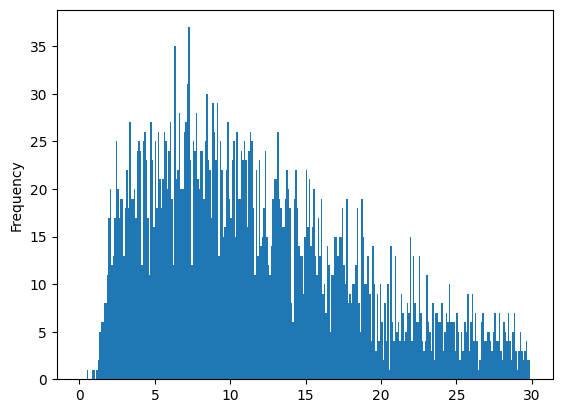

In [42]:
logs_grouped_messages_drop.query("time_spent < 30")["time_spent"].plot(kind="hist", bins=np.arange(0, 30, .1))

count    1930.000000
mean       12.257995
std         6.914632
min         0.935102
25%         6.648971
50%        11.192058
75%        16.877261
max        29.987893
Name: time_spent, dtype: float64
--------------------
count    1934.000000
mean       11.398226
std         6.807650
min         0.551819
25%         6.010934
50%        10.016532
75%        15.507016
max        29.907912
Name: time_spent, dtype: float64


<Axes: ylabel='Frequency'>

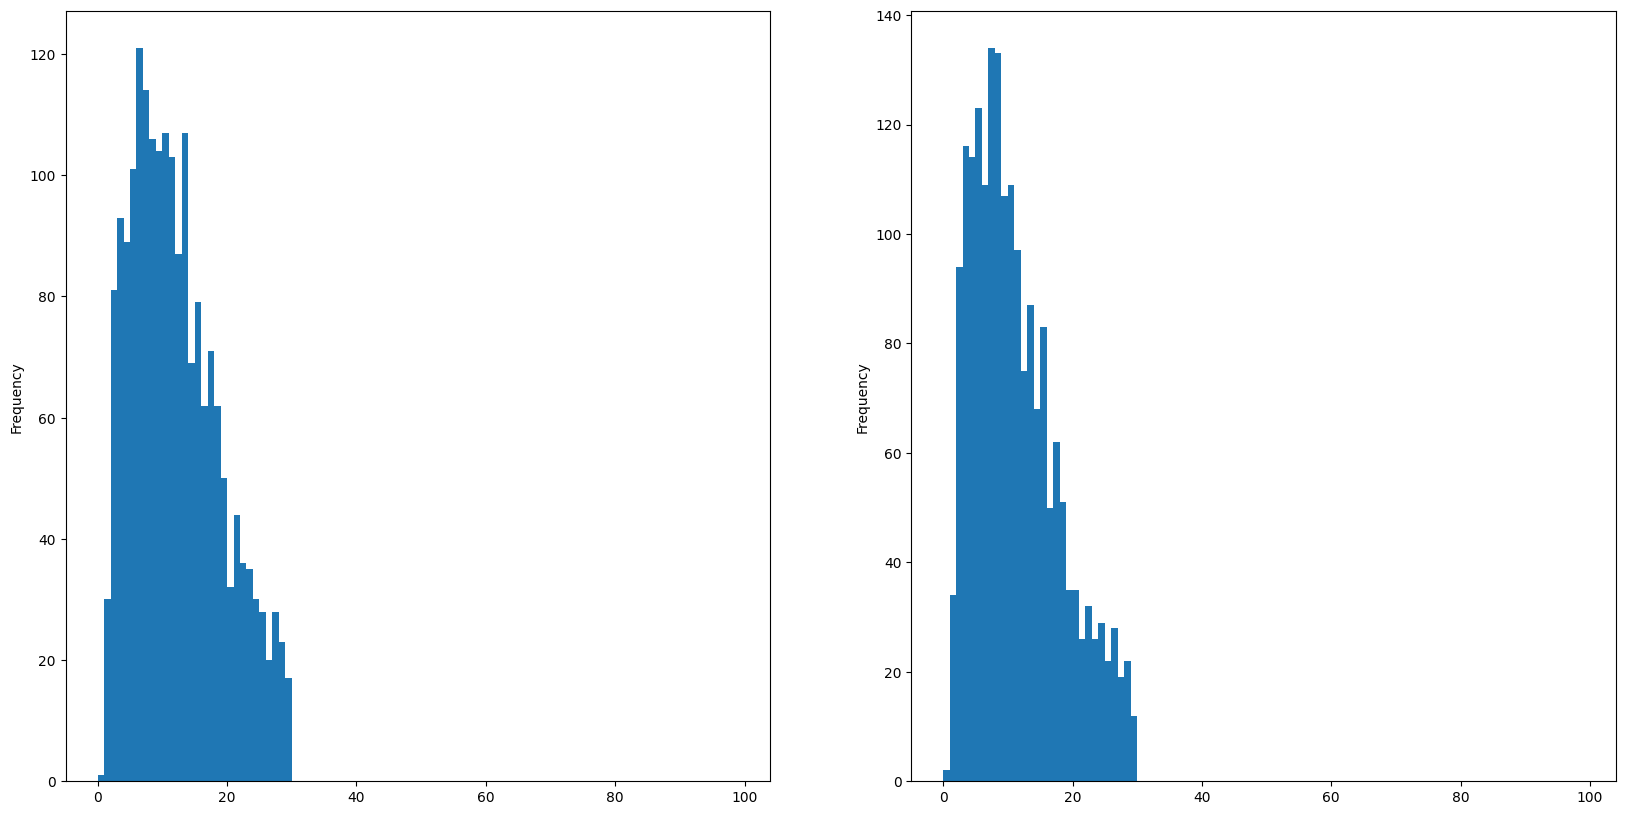

In [43]:
group_a = logs_grouped_messages_drop[logs_grouped_messages_drop["userGroup"] == "A"].query("time_spent < 30 and n_mess < 50")
group_b = logs_grouped_messages_drop[logs_grouped_messages_drop["userGroup"] == "B"].query("time_spent < 30 and n_mess < 50")
print(group_a["time_spent"].describe())
print("-"*20)
print(group_b["time_spent"].describe())
fig, axs = plt.subplots(1,2, figsize=(20, 10))
group_a["time_spent"].plot(kind="hist", bins=np.arange(0, 100, 1), ax=axs[0])
group_b["time_spent"].plot(kind="hist", bins=np.arange(0, 100, 1), ax=axs[1])


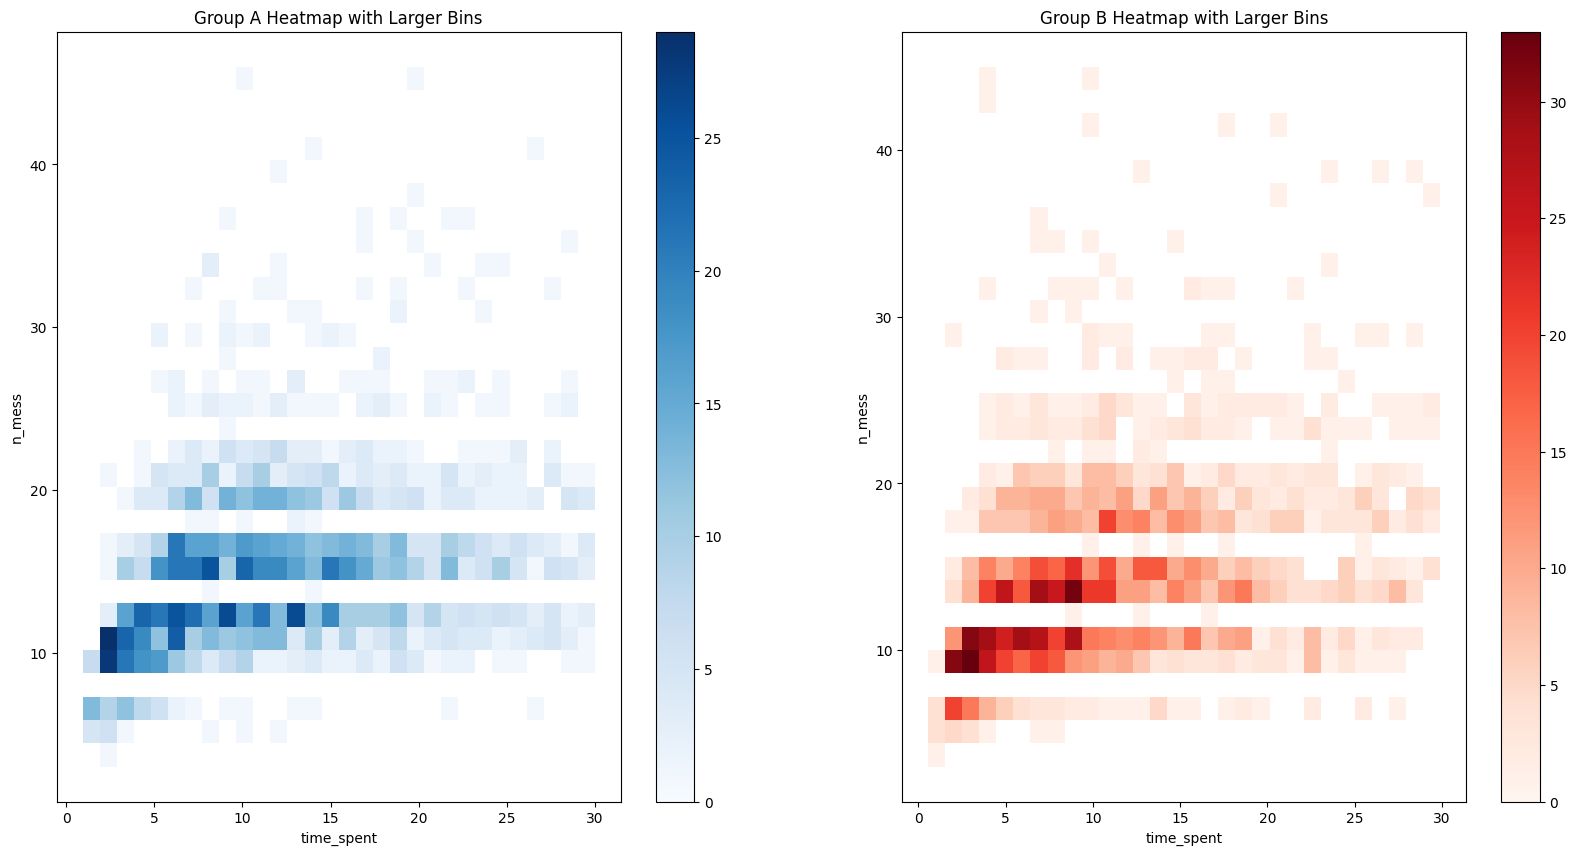

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Group A heatmap with larger bins
sns.histplot(data=group_a, x="time_spent", y="n_mess", bins=30, cbar=True, ax=axs[0], cmap="Blues")
axs[0].set_title('Group A Heatmap with Larger Bins')

# Group B heatmap with larger bins
sns.histplot(data=group_b, x="time_spent", y="n_mess", bins=30, cbar=True, ax=axs[1], cmap="Reds")
axs[1].set_title('Group B Heatmap with Larger Bins')

plt.show()


In [45]:
logs_grouped_messages_drop

,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,exerciseName,controlGroup,userGroup,week,n_sent,n_received,n_mess,finish_time,start_time,time_spent
4,2024-03-13 16:35:30.072217773,k57000mdpmrfm67q4eymvsbqns6n6ezf,j571e3e401tqj2mag6mjgrcynx6n7t96,k1715d99fyvzt35jfm2638g3nd6n35z3,exerciseCompleted,js7534h7gnm8pmyem0n6ttdb816mb94w,explain,NaN,NaN,NaN,Heap Sort,A,B,Quiz #3,6,5,11,2024-03-13 16:35:30.072217773,2024-03-13 16:32:17.567504395,3.208412
14,2024-05-21 08:07:15.249278809,k57001dz6as5pft43vexeg069n6shdy8,j57eayxtbg1e22v1s9yk7me2zh6sh4m7,k177dxhnpwwtrq9dy5770jmrwx6rvzrr,exerciseCompleted,js76m5g9wh37e6px2tyb5psbvx6mg0tp,explain,NaN,NaN,NaN,Bellman-Ford,B,A,Quiz #10,6,5,11,2024-05-21 08:07:15.249278809,2024-05-21 08:04:55.286880615,2.332707
24,2024-04-17 11:31:55.666209717,k57002bxkbhn3xaj4rjsfpdp9d6qc0bn,j57a3tpmvs51dbzneh2m1309bh6qdkf8,k171kqa60g6a9qpm0f0jv07wn16ptnr1,exerciseCompleted,js788ecjy0bjd2azdgf9x43yk96mdat0,explain,NaN,NaN,NaN,Breadth-First Search,B,A,Quiz #6,10,9,19,2024-04-17 11:31:55.666209717,2024-04-17 09:03:17.297376221,148.639481
61,2024-04-23 10:36:35.283729736,k5700614q3cbxct449tpkhtmrd6qr3wz,j57ez0xkm2mtz1fdvktvz6mbh16qrx68,k17aatn2xs5xgqg6cgcjm1tqcn6q0cw7,exerciseCompleted,js73t5rvpr3a90mdxdd8yvrzkn6mmp42,explain,NaN,NaN,NaN,Depth-First Search,A,B,Quiz #6,14,13,27,2024-04-23 10:36:35.283729736,2024-04-22 22:24:43.997249756,731.854775
62,2024-03-17 07:20:21.786651855,k57006c0m2f7cb8q6yt7cvfe1d6nfrz5,j577rvvg108ms7y86n71ra8w956nfnzj,k173an7ns7g76j493paexdh88d6n3bsh,exerciseCompleted,js75xfp2h55x14p9g4zhf2azw56mfxby,explain,NaN,NaN,NaN,Priority Queues,B,A,Quiz #3,10,9,19,2024-03-17 07:20:21.786651855,2024-03-17 07:12:57.335328369,7.407522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153844,2024-05-20 08:32:54.025119141,k57fzehdjz6zxqppfaqva185tx6sf1js,j57b2nws0mb9bn0xsthnv64awd6sfp7h,k177dxhnpwwtrq9dy5770jmrwx6rvzrr,exerciseCompleted,js7fevm1btqznxbqs17c8hmy0s6md575,explain,NaN,NaN,NaN,Bellman-Ford,B,A,Quiz #10,3,2,5,2024-05-20 08:32:54.025119141,2024-05-20 08:31:28.651372559,1.422896
153855,2024-05-20 19:01:55.188647217,k57fzg92h7a20ntb2nzdtq13f96sedcr,j57egsa8zbspwsvmd717cca5pn6sepjr,k176kkt806khrpxnctb9hczm316rtsrq,exerciseCompleted,js74jr9c4cnqhjds24d44j4kmh6mb07r,explain,NaN,NaN,NaN,Dijkstra,A,B,Quiz #10,6,5,11,2024-05-20 19:01:55.188647217,2024-05-20 18:57:54.854195801,4.005574
153870,2024-05-12 19:43:35.857735352,k57fzj15m7t7qgg4q1vb5ecp0n6rzecf,j57f8myra4e6vewnsbk3qcfca16rzq1e,k17c95d62th7c5e5dq5b05s1ex6rjp81,exerciseCompleted,js72s3x6qh9rd266x1pfg4baen6mhyd9,explain,NaN,NaN,NaN,Prim's Algorithm,B,A,Quiz #9,8,7,15,2024-05-12 19:43:35.857735352,2024-05-12 19:35:26.212779785,8.160749
153966,2024-05-27 22:32:27.733605469,k57fzvedr5thayk0pryc1ca39s6sx964,j57ajbvjsfnh52sd33czy47rps6swghw,k17416m11n2qpqy5sr2zz6782s6s2y2n,exerciseCompleted,js7636qxyx41pg59t5vt1se6j56mfnys,explain,NaN,NaN,NaN,Quicksort,B,A,Quiz #11,7,6,13,2024-05-27 22:32:27.733605469,2024-05-27 22:10:11.778369141,22.265921


In [46]:
logs_grouped

,_creationTime,_id,attemptId,exerciseId,type,userId,variant,details,systemMessageId,userMessageId,exerciseName,controlGroup,userGroup,week
0,2024-05-11 15:56:52.688503174,k570005nhp144860betwtwy7v56rx64m,j571kc5p8ah7yvj1xhng7nzpgs6rxy2m,k179wpzex0za69rx2wyv02e9hd6rj4fb,attemptStarted,js71tk2nax2wvs97m3vgc5erp16mds09,reading,NaN,NaN,NaN,Kruskal's algorithm,A,A,Quiz #9
1,2024-04-16 08:00:01.116921631,k57000a4rv5wgy13d63pqyt51s6qb2vv,j57adjsev6qjazakv9p4ad7qwh6qany3,k1710bmgh2mwgaqv7sjkmmfh1x6pveqf,quizSubmission,js7ese808vctnr15sy1te2pvx96mndmx,explain,"{'answers': [2.0, 0.0, 2.0], 'correctness': 1....",NaN,NaN,Optimal Binary Search Trees,A,B,Quiz #5
2,2024-05-20 16:28:14.092592285,k57000d308fpr45yqrprf6wrs56see5h,j572qtbd19x89mraje17mmj30x6sen0s,k176kkt806khrpxnctb9hczm316rtsrq,quizSubmission,js78b7hq6r6pk2c0mm9d2he91s6mjb8v,reading,"{'answers': [2.0, 3.0, 0.0], 'correctness': 1....",NaN,NaN,Dijkstra,A,A,Quiz #10
3,2024-04-18 08:10:36.998193848,k57000m99awdk4jw41cjfe4jkn6qf1jj,j572w733907q5k2w0kkk4a19z96qfaec,k171kqa60g6a9qpm0f0jv07wn16ptnr1,quizSubmission,js7e56b2v2t5nacr7e4n8dnn3d6mb606,explain,"{'answers': [0.0, 1.0, 1.0], 'correctness': 0....",NaN,NaN,Breadth-First Search,B,A,Quiz #6
4,2024-03-13 16:35:30.072217773,k57000mdpmrfm67q4eymvsbqns6n6ezf,j571e3e401tqj2mag6mjgrcynx6n7t96,k1715d99fyvzt35jfm2638g3nd6n35z3,exerciseCompleted,js7534h7gnm8pmyem0n6ttdb816mb94w,explain,NaN,NaN,NaN,Heap Sort,A,B,Quiz #3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153997,2024-04-04 09:59:25.539958252,k57fzzawztspx74s56dd8v9g7h6pkea6,j57cq176xgq49ebe4hq4ec4bb96pjfc1,k17asvnfeyp3q949hdkwjq2and6p2x6e,messageSent,js7ejegwwy13npt4t5xmxfaze16mf7wj,explain,NaN,jd765cr60qe2ygzfqsgq9950996pj5fm,jd77rttn3djr1548bzs6jp24hs6pkmyv,Matrix-Chain Multiplication,A,B,Quiz #4
153998,2024-04-23 10:58:30.496422607,k57fzzbpy6sndtetjcsrfm8j7n6qrk4f,j573jw31r3p36xs9prfbskv8sn6qshfr,k17aatn2xs5xgqg6cgcjm1tqcn6q0cw7,feedbackGiven,js75phnd9pfy1mp9b3s4w94f0d6mjzaa,explain,NaN,jd70ajdywrabes973rbs30j3ax6qsnfk,NaN,Depth-First Search,A,B,Quiz #6
153999,2024-05-06 22:05:16.395833740,k57fzzdgj1jvxwbbb443hfkej96rkktd,j57ck5p09yecbjpse269svw8eh6rkapf,k1768n9arfqk6vpqtsaxgs3m156qx8mp,messageSent,js77jjffzjf9pskspa6hh9sknh6ma65a,explain,NaN,jd764p5pff8zfxjf67f3rb2rgn6rj0xv,jd7920e1qrchh4fj403hjw9xj16rkyqt,Edge disjoint paths via max flow,A,B,Quiz #8
154000,2024-04-18 12:31:21.107867188,k57fzzgqsqtqrqm43bfrgpazth6qfv3c,j573hc3tac12sym478a3f9634d6qe4yq,k17aatn2xs5xgqg6cgcjm1tqcn6q0cw7,attemptStarted,js77gaavvhwwnth677vgafz3sd6mbgt9,explain,NaN,NaN,NaN,Depth-First Search,A,B,Quiz #6
